In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import missingno as msno
from bokeh.core.properties import value
from bokeh.io import show,output_notebook
from bokeh.plotting import figure
from bokeh.models import (
    ColumnDataSource,
    HoverTool,
    LogColorMapper
)
from bokeh.palettes import Viridis6 as palette
from bokeh.layouts import row

In [2]:
%matplotlib inline

In [3]:
output_notebook()

Loading BokehJS ...

In [6]:
df = pd.read_csv('lotr.csv')

In [9]:
df[df =="Unknow"] = np.nan
df[df =="Unknown"] = np.nan
col = ['birth','death','gender','hair','height','name','race','realm','spouse']

In [10]:
df

birth  \
0                                                  NaN   
1                                              TA 2978   
2                                                  NaN   
3                                               TA 280   
4                                                  NaN   
5                                              SA 2709   
6                                                  NaN   
7                                                   YT   
8                                                  NaN   
9                                              SA 3219   
10                                             SA 3118   
11                                             SA 2876   
12                                             SA 2960   
13                                             TA 2866   
14                                                 NaN   
15                                     Late ,Third Age   
16                                  Perhaps ,Firstborn   
17                                                 NaN   
18                                                 NaN   
19                                                 NaN   
20                                    Early ,First Age   
21                                              TA 654   
22                                             SA 2277   
23                                             SA 1320   
24                                             SA 2136   
25                                             SA 1174   
26                                             SA 3035   
27                                             SA 3117   
28                                             SA 1474   
29                                              SA 350   
..                                                 ...   
881               Possibly before the Creation of Arda   
882                                    Late ,Third Age   
883                                             TA 136   
884                                                 YT   
885                                            TA 2994   
886                                                NaN   
887                                                NaN   
888                                 Years of the Trees   
889                                 Years of the Trees   
890                                             TA 726   
891                                                NaN   
892  Sometime during ,Years of the Trees, or the ,F...   
893                                                 YT   
894                                   Late ,Second Age   
895                                            TA 3017   
896                       Between ,SA 700, and ,SA 750   
897                       Between ,SA 700, and ,SA 750   
898                                                NaN   
899                                    Late ,First Age   
900                                            TA 2544   
901                                            TA 1330   
902                        Before the creation of Arda   
903                                            TA 2827   
904                                                NaN   
905                                                NaN   
906                                     Mid ,First Age   
907                                                NaN   
908                 YT during the ,Noontide of Valinor   
909                                            TA 2917   
910                                    Before ,TA 1944   

                                       death  gender  \
0                                        NaN  Female   
1                          February 26 ,3019    Male   
2                                March ,3019    Male   
3                                     TA 515    Male   
4                                        NaN    Male   
5                                    SA 2962    Male   
6                                        NaN    Male   
7   

In [11]:
for i in df:    
    df[i] = df[i].str.replace(r"\,\[.*\]","").str.replace(re.escape(", ?"),"").str.replace(re.escape(",?"),"").str.replace(re.escape(",,"),"").str.replace(r"\, \(.*\)","").str.replace(re.escape("?"),"").str.replace(re.escape(", ,"),"")
df


birth  \
0                                                  NaN   
1                                              TA 2978   
2                                                  NaN   
3                                               TA 280   
4                                                  NaN   
5                                              SA 2709   
6                                                  NaN   
7                                                   YT   
8                                                  NaN   
9                                              SA 3219   
10                                             SA 3118   
11                                             SA 2876   
12                                             SA 2960   
13                                             TA 2866   
14                                                 NaN   
15                                     Late ,Third Age   
16                                  Perhaps ,Firstborn   
17                                                 NaN   
18                                                 NaN   
19                                                 NaN   
20                                    Early ,First Age   
21                                              TA 654   
22                                             SA 2277   
23                                             SA 1320   
24                                             SA 2136   
25                                             SA 1174   
26                                             SA 3035   
27                                             SA 3117   
28                                             SA 1474   
29                                              SA 350   
..                                                 ...   
881               Possibly before the Creation of Arda   
882                                    Late ,Third Age   
883                                             TA 136   
884                                                 YT   
885                                            TA 2994   
886                                                NaN   
887                                                NaN   
888                                 Years of the Trees   
889                                 Years of the Trees   
890                                             TA 726   
891                                                NaN   
892  Sometime during ,Years of the Trees, or the ,F...   
893                                                 YT   
894                                   Late ,Second Age   
895                                            TA 3017   
896                       Between ,SA 700, and ,SA 750   
897                       Between ,SA 700, and ,SA 750   
898                                                NaN   
899                                    Late ,First Age   
900                                            TA 2544   
901                                            TA 1330   
902                        Before the creation of Arda   
903                                            TA 2827   
904                                                NaN   
905                                                NaN   
906                                     Mid ,First Age   
907                                                NaN   
908                 YT during the ,Noontide of Valinor   
909                                            TA 2917   
910                                    Before ,TA 1944   

                                       death  gender  \
0                                        NaN  Female   
1                          February 26 ,3019    Male   
2                                March ,3019    Male   
3                                     TA 515    Male   
4                                        NaN    Male   
5                                    SA 2962    Male   
6                                        NaN    Male   
7   

In [12]:
df.describe()

birth     death gender  hair height    name race   realm  \
count               704       596    768   177     98     911  771     197   
unique              458       389      5    86     52     911   47      75   
top     Late ,Third Age  Immortal   Male  Dark   Tall  Daeron  Men  Gondor   
freq                 49        22    630    29     39       1  388      33   

              spouse  
count            508  
unique           215  
top     Unnamed wife  
freq             237

In [13]:
script = pd.read_csv("lotrscript.csv")

In [14]:
for i in range(len(script['char'])):
    script['char'][i] = script['char'][i][0:script['char'][i].index(':')]
script

char                                             dialog  \
0        DEAGOL  Oh Smeagol Ive got one! , Ive got a fish Smeag...   
1       SMEAGOL  Pull it in! Go on, go on, go on, pull it in! ,...   
2        DEAGOL                                           Arrghh!    
3       SMEAGOL                                     Deagol! ,\r\n    
4       SMEAGOL                                     Deagol! ,\r\n    
5       SMEAGOL                                     Deagol! ,\r\n    
6       SMEAGOL                Give us that! Deagol my love ,\r\n    
7        DEAGOL                                        Why? ,\r\n    
8       SMEAGOL  Because� , it�s my birthday and I \r\nwants it...   
9       SMEAGOL                                My precious. ,\r\n    
10      SMEAGOL                               They cursed us,\r\n    
11      (GOLLUM                                    Murderer),\r\n    
12      SMEAGOL  �Murderer� they called us. They cursed us and ...   
13      SMEAGOL  Gollum� Gollum� Gollum� , and we wept \r\nprec...   
14      SMEAGOL  and cool, so nice for feet� and we only wish t...   
15      SMEAGOL  And we forgot the taste of bread, the sound of...   
16    \r\nFRODO                      \r\n    Gandalf? ,\r\n          
17    \r\nFRODO                                  \r\n    Oooohhh!    
18    \r\nMERRY                              \r\n    Frodo! ,\r\n    
19    \r\nGIMLI                             \r\n    Aaaahh! ,\r\n    
20    \r\nFRODO                              \r\n    Gimli! ,\r\n    
21       GOLLUM                              My precious!,\r\n       
22       GOLLUM  Wake up! , Wake up! \r\n    ,Wake up sleepies!...   
23          SAM         Haven�t you had any sleep Mr Frodo? ,\r\n    
24          SAM  And I�ve gone and had too much. , \r\nIt must ...   
25        FRODO  No, it isn�t. It isn�t midday yet. , The days ...   
26       GOLLUM                  Come on! Must go! No time! ,\r\n    
27          SAM  Not before Mr Frodo�s had something to eat. ,\...   
28       GOLLUM                      No time to lose silly! ,\r\n    
29          SAM                                        Here.,\r\n    
...         ...                                                ...   
2360     PIPPIN  We've had one yes.  What about second breakfas...   
2361      MERRY  Don't think he knows about second breakfast Pi...   
2362     PIPPIN  What about elvenses ? Luncheon, Afternoon Tea,...   
2363      MERRY                       I wouldn't count on it,\r\n    
2364      MERRY                                      Pippin!,\r\n    
2365    GANDALF  They will be. , ,\r\n    You must come to Mina...   
2366    GANDALF  Of all the Hobbits, Peregrin Took, you are the...   
2367     PIPPIN                          Where are we going?,\r\n    
2368      MERRY  Why did you look? Why do you always have to lo...   
2369     PIPPIN               I don�t know, I can�t help it.,\r\n    
2370      MERRY                               You never can!,\r\n    
2371     PIPPIN      I�m sorry alright? I won�t do it again.,\r\n    
2372      MERRY  Don�t you understand? The enemy thinks you hav...   
2373     PIPPIN  And you? You�re coming with me? , \r\n    Merr...   
2374      MERRY                                     Come on!,\r\n    
2375     PIPPIN                     How far is Minas Tirith?,\r\n    
2376    GANDALF  Three days ride as the Nazg�l flies. And you�d...   
2377      MERRY               Here, something for the road. ,\r\n    
2378     PIPPIN            The last of the Longbottom Leaf? ,\r\n    
2379      MERRY  I know you�ve run out. You smoke too much Pipp...   
2380     PIPPIN              But, we�ll see each other soon?,\r\n    
2381     PIPPIN                                     Wont we?,\r\n    
2382      MERRY  I don�t know! I don�t know whats going to happ...   
2383     PIPPIN                                      Merry? ,\r\n    
2384    GANDALF  Run, Shadowfax show us the meaning of haste.,\...   
2385     PIPPIN      

In [15]:
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', None)  

In [16]:
for i in script:
    script[i]=script[i].str.replace("�","\'").str.replace(re.escape(",\r\n"),"").str.replace(re.escape("\r\n"),"").str.replace("Movie Script","")
for i in range(len(script["char"])):
    script["char"][i] = script["char"][i].replace(re.escape("("),"").replace(re.escape(")"),"")
    
script

char  \
0     DEAGOL                     
1     SMEAGOL                    
2     DEAGOL                     
3     SMEAGOL                    
4     SMEAGOL                    
5     SMEAGOL                    
6     SMEAGOL                    
7     DEAGOL                     
8     SMEAGOL                    
9     SMEAGOL                    
10    SMEAGOL                    
11    (GOLLUM                    
12    SMEAGOL                    
13    SMEAGOL                    
14    SMEAGOL                    
15    SMEAGOL                    
16    FRODO                      
17    FRODO                      
18    MERRY                      
19    GIMLI                      
20    FRODO                      
21    GOLLUM                     
22    GOLLUM                     
23    SAM                        
24    SAM                        
25    FRODO                      
26    GOLLUM                     
27    SAM                        
28    GOLLUM                     
29    SAM                        
30    FRODO                      
31    SAM                        
32    FRODO                      
33    FRODO                      
34    GANDALF                    
35    ARAGORN                    
36    ARAGORN                    
37    ARAGORN                    
38    ARAGORN                    
39    FRODO                      
40    FRODO                      
41    PIPPIN                     
42    HOBBIT                     
43    ROSIE                      
44    SAM                        
45    FRODO                      
46    SAM                        
47    GOLLUM                     
48    MERRY                      
49    PIPPIN                     
50    MERRY                      
51    PIPPIN                     
52    MERRY                      
53    PIPPIN                     
54    MERRY                      
55    GIMLI                      
56    PIPPIN                     
57    FRODO                      
58    SAM                        
59    FRODO                      
60    SAM                        
61    FRODO                      
62    FRODO                      
63    BILBO                      
64    FRODO                      
65    BILBO                      
66    PIPPIN                     
67    GIMLI                      
68    GANDALF                    
69    MERRY                      
70    TREEBEARD                  
71    ARAGORN                    
72    GANDALF                    
73    GIMLI                      
74    GANDALF                    
75    SARUMAN                    
76    THEODEN                    
77    SARUMAN                    
78    GANDALF                    
79    FRODO                      
80    BILBO                      
81    BILBO                      
82    GALADRIL                   
83    ELROND                     
84    BILBO                      
85    GANDALF                    
86    SAM                        
87    FRODO                      
88    SAM                        
89    FRODO                      
90    SARUMAN                    
91    GIMLI                      
92    GANDALF                    
93    SARUMAN                    
94    GANDALF                    
95    THEODEN                    
96    SARUMAN                    
97    THEODEN                    
98    SARUMAN                    
99    GRIMA                      
100   FRODO VOICE OVER           
101   SAM                        
102   PIPPIN                     
103   GANDALF                    
104   PIPPIN                     
105   GANDALF                    
106   PIPPIN                     
107   GANDALF                    
108   THEODEN                    
109   WITCH KING                 
110   EOWYN                      
111   EOWYN                      
112   EOWYN                      
113   FARAMIR                    
114   FARAMIR                    
115   SAM                        
116   SARUMAN                    
117   GRIMA   

In [18]:
script.to_csv("script.csv")

In [617]:
msno.matrix(df )

SyntaxError: invalid syntax (<ipython-input-617-d1442a1ed8d8>, line 1)

In [ ]:
msno.heatmap(df)

In [618]:
race_ = df

In [619]:
race_ = race_[~race_.race.isnull()]
race_ = race_.reset_index(drop=True)
race_

Unnamed: 0  \
0    0            
1    1            
2    2            
3    3            
4    4            
5    5            
6    6            
7    7            
8    9            
9    10           
10   11           
11   12           
12   13           
13   15           
14   16           
15   19           
16   20           
17   21           
18   22           
19   23           
20   24           
21   25           
22   26           
23   27           
24   28           
25   29           
26   30           
27   31           
28   32           
29   33           
30   34           
31   35           
32   36           
33   37           
34   38           
35   39           
36   41           
37   43           
38   44           
39   45           
40   46           
41   47           
42   48           
43   49           
44   50           
45   51           
46   52           
47   53           
48   55           
49   56           
50   57           
51   59           
52   60           
53   61           
54   62           
55   63           
56   64           
57   67           
58   68           
59   69           
60   71           
61   72           
62   73           
63   74           
64   75           
65   76           
66   77           
67   78           
68   80           
69   81           
70   82           
71   83           
72   85           
73   86           
74   87           
75   88           
76   89           
77   90           
78   91           
79   92           
80   94           
81   95           
82   96           
83   97           
84   98           
85   99           
86   101          
87   103          
88   105          
89   106          
90   108          
91   110          
92   111          
93   112          
94   114          
95   117          
96   118          
97   119          
98   120          
99   121          
100  122          
101  123          
102  124          
103  125          
104  126          
105  127          
106  128          
107  129          
108  130          
109  131          
110  133          
111  134          
112  135          
113  136          
114  137          
115  138          
116  139          
117  140          
118  141          
119  142          
120  143          
121  144          
122  145          
123  146          
124  147          
125  148          
126  149          
127  150          
128  151          
129  152          
130  153          
131  154          
132  156          
133  157          
134  158          
135  159          
136  160          
137  162          
138  164          
139  165          
140  166          
141  167          
142  168          
143  169          
144  170          
145  171          
146  173          
147  174          
148  175          
149  176          
150  177          
151  178          
152  179          
153  180          
154  181          
155  182          
156  183          
157  184          
158  185          
159  186          
160  187          
161  188          
162  189          
163  190          
164  191          
165  192          
166  193          
167  194          
168  195          
169  197          
170  198          
171  199          
172  200          
173  201          
174  202          
175  203          
176  204          
177  205          
178  206          
179  207          
180  208          
181  209          
182  210          
183  211          
184  212          
185  213          
186  214          
187  215          
188  216          
189  217          
190  218          
191  219          
192  220          
193  222          
194  223          
195  224          
196  225          
197  226          
198  227          
199  228          
200  229          
201  230          
202  231          
203  232          
204  233          
205  234          
206  235          
207  236          
208  237          
209  238       

In [620]:
for i in range(len(race_["race"])):
    if "Men" in race_["race"][i]:
        race_["race"][i] = "Men"
    elif 'Hobbit' in race_["race"][i]:
        race_["race"][i] = "Hobbits"
    elif 'Orc' in race_["race"][i]:
        race_["race"][i] = "Orcs"
    elif 'Dwar' in race_["race"][i]:
        race_["race"][i] = "Dwarves"
    elif 'Dragon' in race_["race"][i]:
        race_["race"][i] = "Dragons"
    elif 'El' in race_["race"][i]:
        race_["race"][i] = "Elves"
    elif 'Half' in race_["race"][i]:
        race_["race"][i] = "Half-elven"
    elif 'Maiar' in race_["race"][i]:
        race_["race"][i] = "Maiar"
    else:
        race_["race"][i]=race_["race"][i]
    

/Users/tianyigu/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/tianyigu/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/tianyigu/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/tianyigu/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:13: SettingWithCopyW

In [621]:
race_group = race_.groupby(["gender","race"])["name"].count()


In [622]:
race_group = race_.groupby(["gender","race"])["name"].count()
race_group = race_group.reset_index()
race_group

gender           race  name
0   Female            Ainur          10  
1   Female            Dwarves        1   
2   Female            Elves          25  
3   Female            Great Spiders  2   
4   Female            Half-elven     2   
5   Female            Hobbits        41  
6   Female            Men            52  
7   Female            Vampire        1   
8   Male              Ainur          14  
9   Male              Balrog         1   
10  Male              Black Uruk     1   
11  Male              Dragons        6   
12  Male              Drúedain       1   
13  Male              Dwarves        43  
14  Male              Eagle          1   
15  Male              Eagles         1   
16  Male              Elves          80  
17  Male              Ents           2   
18  Male              Ents,Onodrim   1   
19  Male              God            1   
20  Male              Great Eagles   2   
21  Male              Half-elven     5   
22  Male              Hobbits        100 
23  Male              Maiar          7   
24  Male              Men            340 
25  Male              Orcs           13  
26  Male              Raven          1   
27  Male              Skin-changer   1   
28  Male              Stone-trolls   1   
29  Male              Uruk-hai       3   
30  Male              Werewolves     2   
31  Male              Wolfhound      1   
32  Males             Men            1   
33  Most likely male  Urulóki        1   
34  male              Hobbits        1

In [623]:
race = ["Men",'Hobbits','Elves','Dwarves','Dragons','Half-elven','Ainur','Orcs']

In [624]:
race_group = race_group[race_group['race'].isin(race)]
race_group = race_group[0:14]
race_group

gender        race  name
0   Female  Ainur       10  
1   Female  Dwarves     1   
2   Female  Elves       25  
4   Female  Half-elven  2   
5   Female  Hobbits     41  
6   Female  Men         52  
8   Male    Ainur       14  
11  Male    Dragons     6   
13  Male    Dwarves     43  
16  Male    Elves       80  
21  Male    Half-elven  5   
22  Male    Hobbits     100 
24  Male    Men         340 
25  Male    Orcs        13

In [625]:


gender = ["Male","Female"]
race = ["Men",'Hobbits','Elves','Dwarves','Ainur','Orcs','Half-elven','Dragons']
colors = ["#6DB5DA", "#FF9292"]

data = {'race' : race,
        'Male'   : [340, 100, 80, 43,14, 13, 5, 6],
        'Female'   : [52, 41, 25, 1, 10, 0, 2, 0]}

source = ColumnDataSource(data=data)
hover = HoverTool(tooltips=[
    ("Male", "@Male"),
    ("Female","@Female")
])
p = figure(x_range=race, plot_width = 800, title="Race VS Gender",tools=[hover],
           toolbar_location=None)

p.vbar_stack(gender, x='race', width=0.9, color=colors, source=source,
             legend=[value(x) for x in gender])

p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
p.axis.minor_tick_line_color = None
p.outline_line_color = None
p.legend.location = "top_right"
p.legend.orientation = "horizontal"



show(p)

E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: counts, fruits [renderer: GlyphRenderer(id='56d27323-0b2f-4cd7-81bc-e1436c2513f1', ...)]
E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: counts, fruits [renderer: GlyphRenderer(id='6506322a-e009-4aa3-b62d-13b28b0c1b3b', ...)]
E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: counts [renderer: GlyphRenderer(id='9077b822-ca9d-46a3-b292-254514c8c1ec', ...)]


In [770]:
year = df

In [771]:
year = year[~year.birth.isnull()]
year = year[~year.death.isnull()]
year = year.reset_index(drop=True)
year

Unnamed: 0  \
0    1            
1    3            
2    5            
3    7            
4    9            
5    10           
6    11           
7    12           
8    13           
9    21           
10   22           
11   23           
12   24           
13   25           
14   26           
15   27           
16   28           
17   29           
18   30           
19   31           
20   32           
21   33           
22   34           
23   35           
24   36           
25   37           
26   38           
27   39           
28   43           
29   44           
30   45           
31   46           
32   47           
33   48           
34   49           
35   50           
36   52           
37   53           
38   55           
39   56           
40   57           
41   59           
42   60           
43   62           
44   63           
45   64           
46   69           
47   72           
48   74           
49   77           
50   78           
51   80           
52   81           
53   83           
54   87           
55   89           
56   91           
57   92           
58   94           
59   96           
60   98           
61   103          
62   106          
63   110          
64   111          
65   112          
66   114          
67   117          
68   122          
69   124          
70   125          
71   126          
72   127          
73   128          
74   129          
75   133          
76   134          
77   135          
78   136          
79   138          
80   139          
81   140          
82   145          
83   147          
84   148          
85   149          
86   150          
87   151          
88   152          
89   153          
90   154          
91   156          
92   157          
93   158          
94   159          
95   160          
96   162          
97   164          
98   165          
99   166          
100  167          
101  168          
102  169          
103  170          
104  171          
105  172          
106  173          
107  174          
108  175          
109  176          
110  177          
111  178          
112  180          
113  181          
114  182          
115  183          
116  184          
117  185          
118  186          
119  191          
120  192          
121  193          
122  194          
123  195          
124  198          
125  199          
126  200          
127  201          
128  202          
129  203          
130  204          
131  207          
132  209          
133  210          
134  212          
135  213          
136  214          
137  216          
138  219          
139  220          
140  222          
141  223          
142  224          
143  225          
144  226          
145  227          
146  228          
147  230          
148  231          
149  233          
150  234          
151  235          
152  237          
153  238          
154  240          
155  241          
156  243          
157  246          
158  247          
159  248          
160  252          
161  253          
162  254          
163  255          
164  256          
165  257          
166  260          
167  262          
168  265          
169  266          
170  267          
171  269          
172  270          
173  271          
174  275          
175  277          
176  278          
177  279          
178  281          
179  282          
180  283          
181  284          
182  285          
183  286          
184  288          
185  291          
186  292          
187  293          
188  294          
189  295          
190  296          
191  297          
192  298          
193  301          
194  302          
195  304          
196  307          
197  308          
198  310          
199  311          
200  313          
201  314          
202  315          
203  316          
204  317          
205  319          
206  321          
207  322          
208  323          
209  324       

In [736]:
year1 = pd.read_csv("year1.txt")
year1

Unnamed: 0  Unnamed: 0.1      birth        death  gender  \
0    0           3             FA 307     FA 398       Male     
1    1           4             Before CA  FA 400       Male     
2    2           5             Before CA  FA 400       Female   
3    3           6             FA 341     FA 420       Female   
4    4           7             FA 338     FA 432       Male     
5    5           8             Before CA  FA 455       Male     
6    6           9             Before CA  FA 455       Male     
7    7           10            FA 361     FA 455       Female   
8    8           11            FA 390     FA 455       Male     
9    9           12            FA 402     FA 460       Male     
10   10          13            FA 420     FA 460       Male     
11   11          14            FA 417     FA 462       Male     
12   12          15            Before CA  FA 465       Male     
13   13          16            Before CA  FA 466       Male     
14   14          17            FA 432     FA 466       Male     
15   15          18            FA 466     FA 469       Female   
16   16          19            FA 214     FA 473       Male     
17   17          20            FA 413     FA 473       Male     
18   18          21            FA 415     FA 473       Female   
19   19          22            FA 442     FA 473       Male     
20   20          23            FA 450     FA 473       Female   
21   21          24            Before CA  FA 484       Male     
22   22          25            FA 440     FA 489       Male     
23   23          26            FA 430     FA 495       Male     
24   24          27            FA 441     FA 495       NaN      
25   25          28            Before CA  FA 495       Male     
26   26          29            FA 464     FA 499       Male     
27   27          30            FA 473     FA 499       Female   
28   28          31            FA 443     FA 500       Female   
29   29          32            FA 470     FA 501       Male     
30   30          33            Before CA  FA 502       Male     
31   31          34            FA 441     FA 502       Male     
32   32          35            Before CA  FA 503       Female   
33   33          36            Before CA  FA 506       Male     
34   34          37            Before CA  FA 506       Male     
35   35          38            Before CA  FA 506       Male     
36   36          39            FA 500     FA 506       Male     
37   37          40            FA 470     FA 506       Male     
38   38          41            Before CA  FA 510       Male     
39   39          42            Before CA  FA 510       Male     
40   40          43            FA 320     FA 510       Male     
41   41          44            Before CA  FA 538       Male     
42   42          45            Before CA  FA 587       Male     
43   43          46            TA 2923    FO 10        Male     
44   44          47            TA 2935    FO 10        Male     
45   45          48            FO 8       FO 103       Male     
46   46          49            FO 10      FO 112       Male     
47   47          50            TA 2879    FO 120       Male     
48   48          51            TA 2931    FO 120       Male     
49   49          52            TA 241     FO 121       Female   
50   50          53            TA 2933    FO 13        Male     
51   51          54            TA 2866    FO 137       Male     
52   52          55            TA 2783    FO 15        Male     
53   53          56            TA 2985    FO 17        Male     
54   54          57            TA 2928    FO 2         Male     
55   55          58            TA 2941    FO 20        Male     
56   56          59            TA 2942    FO 22        Male     
57   57          60            FO 43      FO 220       Male     
58   58          61            TA 2985    FO 23        Male     
59   59          62            TA 2983    FO 27        Female   
60   60          63            TA 2978  

In [773]:
year1['birth_y'] = np.zeros(len(year1["birth"])).astype(int)
year1['death_y'] = np.ones(len(year1["birth"])).astype(int)
year1['lifelong_y'] = np.ones(len(year1["birth"])).astype(int)
#del year1['Unnamed: 0']
#del year1['Unnamed: 0.1.1']
#del year1['Unnamed: 0.1']

In [774]:
for i in range(len(year1['birth'])):
    if year1['birth'][i][0:2] == "FA":
        year1['birth_y'][i] = int(year1['birth'][i][3:])
    elif year1['birth'][i][0:2] == "SA":
        year1['birth_y'][i] = int(year1['birth'][i][3:])+600
    elif year1['birth'][i][0:2] == "TA":
        year1['birth_y'][i] = int(year1['birth'][i][3:])+600+3450
    elif year1['birth'][i][0:2] == "FO":
        year1['birth_y'][i] = int(year1['birth'][i][3:])+600+3450+3021
    elif year1['birth'][i][0:2] == "SA":
        year1['birth_y'][i] = int(year1['birth'][i][3:])+600
    elif year1['birth'][i] == "Before CA":
        year1['birth_y'][i] = -1

/Users/tianyigu/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/tianyigu/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/tianyigu/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/tianyigu/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:9: SettingWithCopyWa

In [775]:
for i in range(len(year1['birth'])):
    if year1['death'][i][0:2] == "FA":
        year1['death_y'][i] = int(year1['death'][i][3:])
    elif year1['death'][i][0:2] == "SA":
        year1['death_y'][i] = int(year1['death'][i][3:])+600
    elif year1['death'][i][0:2] == "TA":
        year1['death_y'][i] = int(year1['death'][i][3:])+600+3450
    elif year1['death'][i][0:2] == "FO":
        year1['death_y'][i] = int(year1['death'][i][3:])+600+3450+3021
    elif year1['death'][i][0:2] == "SA":
        year1['death_y'][i] = int(year1['death'][i][3:])+600
    elif year1['death'][i] == "Immortal":
        year1['death_y'][i] = 7291
    elif year1['death'][i] == "Still alive":
        year1['death_y'][i] = 7291

/Users/tianyigu/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/tianyigu/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/tianyigu/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/tianyigu/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWa

In [776]:
year1['lifelong_y'] = year1['death_y']-year1['birth_y']
year1

birth        death  gender  \
0    FA 307     FA 398       Male     
1    Before CA  FA 400       Male     
2    Before CA  FA 400       Female   
3    FA 341     FA 420       Female   
4    FA 338     FA 432       Male     
5    Before CA  FA 455       Male     
6    Before CA  FA 455       Male     
7    FA 361     FA 455       Female   
8    FA 390     FA 455       Male     
9    FA 402     FA 460       Male     
10   FA 420     FA 460       Male     
11   FA 417     FA 462       Male     
12   Before CA  FA 465       Male     
13   Before CA  FA 466       Male     
14   FA 432     FA 466       Male     
15   FA 466     FA 469       Female   
16   FA 214     FA 473       Male     
17   FA 413     FA 473       Male     
18   FA 415     FA 473       Female   
19   FA 442     FA 473       Male     
20   FA 450     FA 473       Female   
21   Before CA  FA 484       Male     
22   FA 440     FA 489       Male     
23   FA 430     FA 495       Male     
24   FA 441     FA 495       NaN      
25   Before CA  FA 495       Male     
26   FA 464     FA 499       Male     
27   FA 473     FA 499       Female   
28   FA 443     FA 500       Female   
29   FA 470     FA 501       Male     
30   Before CA  FA 502       Male     
31   FA 441     FA 502       Male     
32   Before CA  FA 503       Female   
33   Before CA  FA 506       Male     
34   Before CA  FA 506       Male     
35   Before CA  FA 506       Male     
36   FA 500     FA 506       Male     
37   FA 470     FA 506       Male     
38   Before CA  FA 510       Male     
39   Before CA  FA 510       Male     
40   FA 320     FA 510       Male     
41   Before CA  FA 538       Male     
42   Before CA  FA 587       Male     
43   TA 2923    FO 10        Male     
44   TA 2935    FO 10        Male     
45   FO 8       FO 103       Male     
46   FO 10      FO 112       Male     
47   TA 2879    FO 120       Male     
48   TA 2931    FO 120       Male     
49   TA 241     FO 121       Female   
50   TA 2933    FO 13        Male     
51   TA 2866    FO 137       Male     
52   TA 2783    FO 15        Male     
53   TA 2985    FO 17        Male     
54   TA 2928    FO 2         Male     
55   TA 2941    FO 20        Male     
56   TA 2942    FO 22        Male     
57   FO 43      FO 220       Male     
58   TA 2985    FO 23        Male     
59   TA 2983    FO 27        Female   
60   TA 2978    FO 30        Male     
61   TA 2988    FO 33        Male     
62   TA 2955    FO 34        Male     
63   TA 2980    FO 42        Male     
64   TA 2920    FO 50        Male     
65   TA 2972    FO 54        Female   
66   TA 2987    FO 57        Male     
67   TA 2990    FO 57        Male     
68   TA 2980    FO 60        Male     
69   TA 2980    FO 61        Male     
70   TA 2981    FO 61        Female   
71   TA 2984    FO 61        Female   
72   TA 2975    FO 63        Female   
73   TA 2985    FO 63        Female   
74   TA 2990    FO 63        Male     
75   TA 2995    FO 63        Female   
76   TA 2982    FO 65        Male     
77   TA 2990    FO 65        Male     
78   TA 2926    FO 7         Male     
79   TA 2983    FO 82        Male     
80   TA 2772    FO 91        Male     
81   TA 3017    FO 95        Male     
82   Before CA  Immortal     Male     
83   Before CA  Immortal     Male     
84   Before CA  Immortal     Male     
85   Before CA  Immortal     Female   
86   Before CA  Immortal     Male     
87   Before CA  Immortal     Male     
88   Before CA  Immortal     Female   
89   Before CA  Immortal     Female   
90   Before CA  Immortal     Female   
91   Before CA  Immortal     Male     
92   Before CA  Immortal     Female   
93   Before CA  Immortal     Male     
94   Before CA  Immortal     Female   
95   Before CA  Immortal     Male     
96   Before CA  Immortal     Male     
97   Before CA  Immortal     Male     
98   Before CA  Immortal     Female   
99   Before CA  Immortal     Male     
100  Before CA  Immortal     Male     
101  Before CA  Immortal     Fe

In [741]:
years['elf'] = years.years.map(lambda year: len(year1[  (year1['birth_y'] <= year) &  
                               (year1['death_y'] >= year) & 
                               (year1['race'] == 'Elves') ]  )      )
years['men'] = years.years.map(lambda year: len(year1[  (year1['birth_y'] <= year) &  
                               (year1['death_y'] >= year) & 
                               (year1['race'] == 'Men') ]  )      )

In [742]:
years['dra'] = years.years.map(lambda year: len(year1[  (year1['birth_y'] <= year) &  
                               (year1['death_y'] >= year) & 
                               (year1['race'] == 'Dwarves') ]  )      )
years['hob'] = years.years.map(lambda year: len(year1[  (year1['birth_y'] <= year) &  
                               (year1['death_y'] >= year) & 
                               (year1['race'] == 'Hobbits') ]  )      )

In [743]:
# a = {'years' : list(range(-1,7292)), 'elf' : list(np.zeros(7293)),'dra' : list(np.zeros(7293)),'men' : list(np.zeros(7293)),'hob' : list(np.zeros(7293))}
# years = pd.DataFrame(a)


In [744]:
#year_men = year1[year1["race"]=='Men'].reset_index(drop=True)
#year_elf = year1[year1["race"]=='Elves'].reset_index(drop=True)
#year_hob = year1[year1["race"]=='Hobbits'].reset_index(drop=True)
#year_dra = year1[year1["race"]=='Dwarves'].reset_index(drop=True)

In [745]:
# a_men = []
# for i in range(len(year_men['birth'])):
#     b =  list(range(year_men['birth_y'][i],year_men['death_y'][i]))
#     a_men = a_men + b
# a_elf = []
# for i in range(len(year_elf['birth'])):
#     b =  list(range(year_elf['birth_y'][i],year_elf['death_y'][i]))
#     a_elf = a_elf + b
# a_hob = []
# for i in range(len(year_hob['birth'])):
#     b =  list(range(year_hob['birth_y'][i],year_hob['death_y'][i]))
#     a_hob = a_hob + b
# a_dra = []
# for i in range(len(year_dra['birth'])):
#     b =  list(range(year_dra['birth_y'][i],year_dra['death_y'][i]))
#     a_dra = a_dra + b


In [746]:
# aa_men = pd.DataFrame(a_men, columns=["count1"])
# ag_men= aa_men.groupby("count1").count1.count()
# agg_men = pd.DataFrame({'year':ag_men.index, 'count':ag_men.values})
# aa_elf = pd.DataFrame(a_elf, columns=["count1"])
# ag_elf= aa_elf.groupby(["count1"]).count1.count()
# agg_elf = pd.DataFrame({'year':ag_elf.index, 'count':ag_elf.values})
# aa_hob = pd.DataFrame(a_hob, columns=["count1"])
# ag_hob= aa_hob.groupby(["count1"]).count1.count()
# agg_hob = pd.DataFrame({'year':ag_hob.index, 'count':ag_hob.values})
# aa_dra = pd.DataFrame(a_dra, columns=["count1"])
# ag_dra= aa_dra.groupby(["count1"]).count1.count()
# agg_dra = pd.DataFrame({'year':ag_dra.index, 'count':ag_dra.values})
# agg_dra

In [747]:
# elf = list(agg_elf["count"])
# men = list(agg_men["count"])
# hob = list(agg_hob["count"])
# dra = list(agg_dra["count"])
# x = range(-1,7300)
# y = [elf,men,hob,dra]
# len(elf)

In [748]:
# a = {'years' : list(range(-1,7292)), 'elf' : list(np.zeros(7293)),'dra' : list(np.zeros(7293)),'men' : list(np.zeros(7293)),'hob' : list(np.zeros(7293))}
# years = pd.DataFrame(a)

In [749]:
# for i in range(7293):
#     if len(agg_elf[agg_elf["year"]==years["years"][i]]) > 0:
#         a = agg_elf[agg_elf["year"]==years["years"][i]].reset_index().loc[0,"count"]
#         years["elf"][i] = a

In [750]:
# for i in range(7293):
#     if len(agg_men[agg_men["year"]==years["years"][i]]) > 0:
#         a = agg_men[agg_men["year"]==years["years"][i]].reset_index().loc[0,"count"]
#         years["men"][i] = a

In [751]:
# for i in range(7293):
#     if len(agg_hob[agg_hob["year"]==years["years"][i]]) > 0:
#         a = agg_hob[agg_hob["year"]==years["years"][i]].reset_index().loc[0,"count"]
#         years["hob"][i] = a

In [752]:
# for i in range(7293):
#     if len(agg_dra[agg_dra["year"]==years["years"][i]]) > 0:
#         a = agg_dra[agg_dra["year"]==years["years"][i]].reset_index().loc[0,"count"]
#         years["dra"][i] = a

In [753]:
years.head()

dra  elf  hob  men  years
0  0    25   0    0   -1    
1  0    25   0    0    0    
2  0    25   0    0    1    
3  0    25   0    0    2    
4  0    25   0    0    3

In [754]:
#sns.mpl.rc("figure", figsize=(1,2))

In [755]:
elf = list(years["elf"])
men = list(years["men"])
hob = list(years["hob"])
dra = list(years["dra"])
y = [men,hob,dra,elf]
x = list(years["years"])


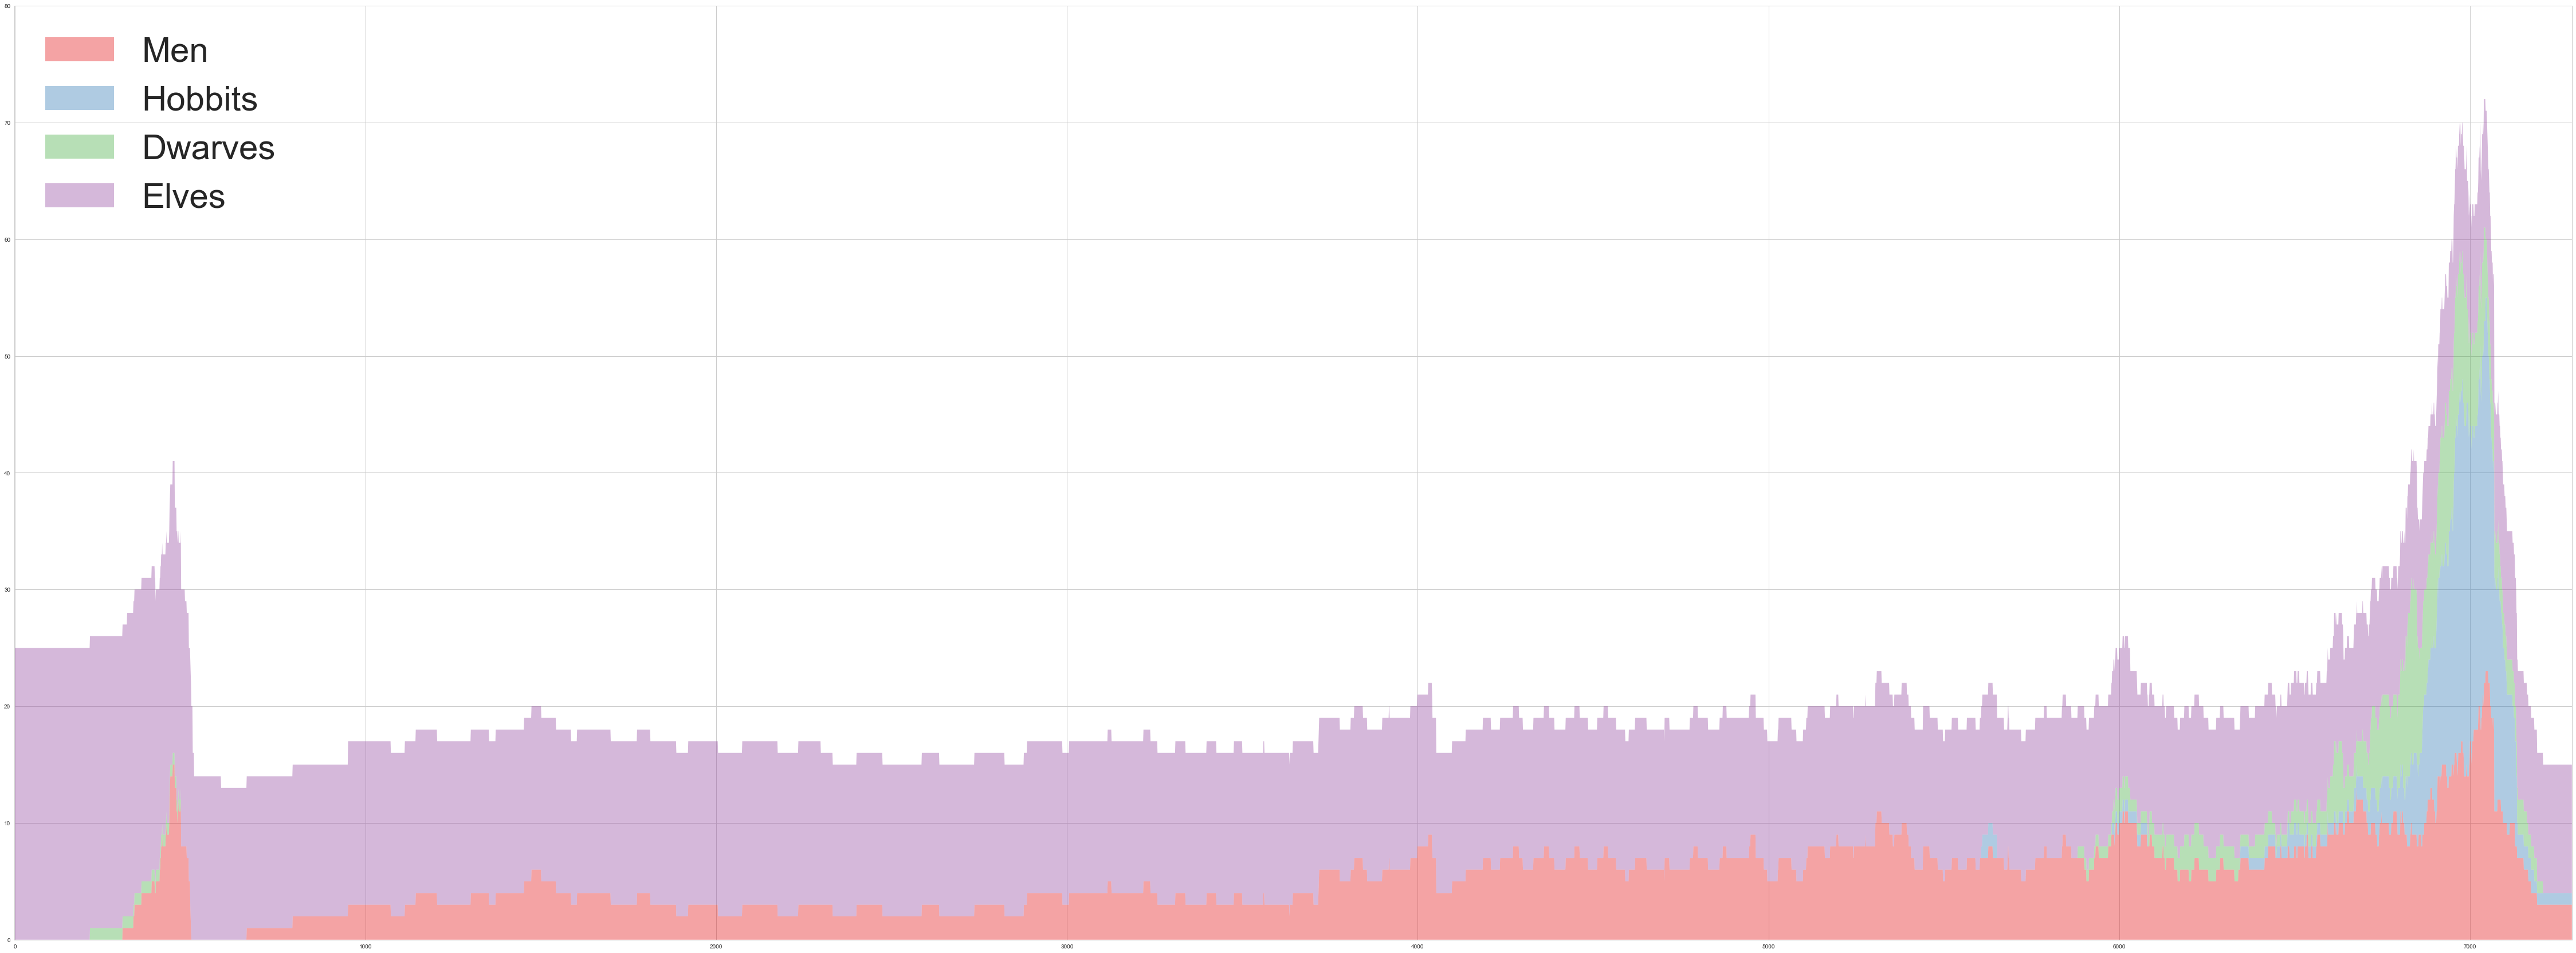

In [756]:
#pal = ["#ffeeb0", "#CC7722", "#34495e", "#2ecc71"]
pal = sns.color_palette("Set1")
plt.stackplot(x,y, labels=['Men','Hobbits','Dwarves',"Elves"], colors=pal, alpha=0.4 )
plt.axis([-1, 7292, 0, 80])
plt.legend(loc=2, prop={'size': 60})
sns.mpl.rc("figure", figsize=(80,30))
#ax.axis([0, 10, 0, 10])
plt.show(p)


In [757]:
year_l = year1[year1['death']!= "Still alive"]
year_l = year_l[year1['death']!= "Immortal"]

/Users/tianyigu/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


In [777]:
year_l = year_l.reset_index(drop = True)
year_l

birth     death  gender                                       hair  \
0    FA 307     FA 398    Male    NaN                                         
1    Before CA  FA 400    Male    Dark                                        
2    Before CA  FA 400    Female  Dark                                        
3    FA 341     FA 420    Female  NaN                                         
4    FA 338     FA 432    Male    NaN                                         
5    Before CA  FA 455    Male    Dark                                        
6    Before CA  FA 455    Male    Golden                                      
7    FA 361     FA 455    Female  Dark brown                                  
8    FA 390     FA 455    Male    Golden                                      
9    FA 402     FA 460    Male    Possibly dark                               
10   FA 420     FA 460    Male    NaN                                         
11   FA 417     FA 462    Male    NaN                                         
12   Before CA  FA 465    Male    Golden                                      
13   Before CA  FA 466    Male    Black with red stripes                      
14   FA 432     FA 466    Male    Dark                                        
15   FA 466     FA 469    Female  Blonde                                      
16   FA 214     FA 473    Male    NaN                                         
17   FA 413     FA 473    Male    NaN                                         
18   FA 415     FA 473    Female  Blonde                                      
19   FA 442     FA 473    Male    Golden                                      
20   FA 450     FA 473    Female  NaN                                         
21   Before CA  FA 484    Male    NaN                                         
22   FA 440     FA 489    Male    NaN                                         
23   FA 430     FA 495    Male    NaN                                         
24   FA 441     FA 495    NaN     NaN                                         
25   Before CA  FA 495    Male    Golden                                      
26   FA 464     FA 499    Male    Dark                                        
27   FA 473     FA 499    Female  Golden                                      
28   FA 443     FA 500    Female  Dark, grey in old age                       
29   FA 470     FA 501    Male    NaN                                         
30   Before CA  FA 502    Male    Silver                                      
31   FA 441     FA 502    Male    Golden, grey (in old age)                   
32   Before CA  FA 503    Female  Black                                       
33   Before CA  FA 506    Male    Fair                                        
34   Before CA  FA 506    Male    Dark                                        
35   Before CA  FA 506    Male    Dark                                        
36   FA 500     FA 506    Male    Possibly dark                               
37   FA 470     FA 506    Male    Possibly dark                               
38   Before CA  FA 510    Male    NaN                                         
39   Before CA  FA 510    Male    Dark                                        
40   FA 320     FA 510    Male    Black                                       
41   Before CA  FA 538    Male    Dark red                                    
42   Before CA  FA 587    Male    Dark red                                    
43   TA 2923    FO 10     Male    NaN                                         
44   TA 2935    FO 10     Male    NaN                                         
45   FO 8       FO 103    Male    NaN                                         
46   FO 10      FO 112    Male    NaN                                         
47   TA 2879    FO 120    Male    Auburn                                      
48   TA 2931    FO 120    Male    Dark                                        
49   TA 241     FO 121    Female  Black                    

In [778]:
for i in range(len(year_l["race"])):
    if "Dwar" in year_l["race"][i]:
        year_l["race"][i] = "Dwarves"
    elif 'Hobbit' in year_l["race"][i]:
        year_l["race"][i] = "Hobbits"
    elif 'Elf' in year_l["race"][i]:
        year_l["race"][i] = "Elves"
    elif 'Dwar' in year_l["race"][i]:
        year_l["race"][i] = "Dwarves"
    elif 'Balrog' in year_l["race"][i]:
        year_l["race"][i] = "Maiar,Balrog"
    elif 'Half-elven' in year_l["race"][i]:
        year_l["race"][i] = "Half-elven"


/Users/tianyigu/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/tianyigu/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/tianyigu/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/tianyigu/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyW

TypeError: argument of type 'float' is not iterable

In [ ]:
year_l

In [761]:
year_long = year_l.groupby("race").count()
year_long

birth  death  gender  hair  height  name  realm  spouse  \
race                                                                    
Dragons       1      1      1       0     0       1     1      0        
Dwarves       28     28     28      6     1       28    11     16       
Elves         19     19     19      18    6       19    9      15       
Elves,Maiar   1      1      1       1     0       1     0      1        
Half-elven    4      4      4       2     0       4     3      4        
Hobbits       75     75     75      16    10      75    0      60       
Maiar         2      2      2       2     1       2     1      2        
Maiar,Balrog  2      2      2       1     1       2     0      0        
Men           209    209    208     38    17      209   107    191      
Men,Rohirrim  1      1      1       0     0       1     1      0        
Orc,Goblin    1      1      1       0     0       1     1      1        
Uruk-hai      3      3      3       3     2       3     2      2        
Werewolves    1      1      1       1     1       1     1      0        

              birth_y  death_y  lifelong_y  
race                                        
Dragons       1        1        1           
Dwarves       28       28       28          
Elves         19       19       19          
Elves,Maiar   1        1        1           
Half-elven    4        4        4           
Hobbits       75       75       75          
Maiar         2        2        2           
Maiar,Balrog  2        2        2           
Men           209      209      209         
Men,Rohirrim  1        1        1           
Orc,Goblin    1        1        1           
Uruk-hai      3        3        3           
Werewolves    1        1        1

In [779]:
year_long = year_l.groupby("race").mean()['lifelong_y']
year_long

race
Dragons         171.000000 
Dwarves         207.428571 
Elves           996.842105 
Elves,Maiar     504.000000 
Half-elven      893.000000 
Hobbits         100.400000 
Maiar           7070.000000
Maiar,Balrog    3790.500000
Men             159.526316 
Men,Rohirrim    74.000000  
Orc,Goblin      47.000000  
Uruk-hai        0.000000   
Werewolves      467.000000 
Name: lifelong_y, dtype: float64

In [780]:
year_long1 = pd.DataFrame(year_long)
year_long1 =year_long1.reset_index()

In [781]:
year_ll = year_long1.sort("lifelong_y",ascending=0)

/Users/tianyigu/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [782]:
year_ll = year_ll[year_ll["race"]!="Dragons"]
year_ll = year_ll[year_ll["race"]!="Uruk-hai"]
year_ll

race   lifelong_y
6   Maiar         7070.000000
7   Maiar,Balrog  3790.500000
2   Elves         996.842105 
4   Half-elven    893.000000 
3   Elves,Maiar   504.000000 
12  Werewolves    467.000000 
1   Dwarves       207.428571 
8   Men           159.526316 
5   Hobbits       100.400000 
9   Men,Rohirrim  74.000000  
10  Orc,Goblin    47.000000

In [783]:
list(year_ll["race"])

['Maiar',
 'Maiar,Balrog',
 'Elves',
 'Half-elven',
 'Elves,Maiar',
 'Werewolves',
 'Dwarves',
 'Men',
 'Hobbits',
 'Men,Rohirrim',
 'Orc,Goblin']

In [784]:
from bokeh.io import show, output_file
from bokeh.models import ColumnDataSource
from bokeh.palettes import Spectral6, Set3
from bokeh.plotting import figure

In [785]:

x = list(year_ll["race"])
y = list(year_ll["lifelong_y"])
y = [int(i) for i in y]

source = ColumnDataSource(data=dict(x=x, y=y, color=Set3[12]))
hover = HoverTool(tooltips=[
    ("years", "@y")
])
p = figure(x_range=x, y_range=(0,8000), plot_height=700, plot_width = 800 ,title="Average Life Span",
           toolbar_location=None, tools=[hover])

p.vbar(x='x', top='y', width=0.9, color='color', legend="x", source=source)

p.xgrid.grid_line_color = None
p.legend.orientation = "horizontal"
p.legend.location = "top_center"
show(p)

/Users/tianyigu/anaconda/lib/python3.6/site-packages/bokeh/models/sources.py:137: BokehUserWarning: ColumnDataSource's columns must be of the same length. Current lengths: ('color', 12), ('x', 11), ('y', 11)
  "Current lengths: %s" % ", ".join(sorted(str((k, len(v))) for k, v in data.items())), BokehUserWarning))


E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: counts, fruits [renderer: GlyphRenderer(id='56d27323-0b2f-4cd7-81bc-e1436c2513f1', ...)]
E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: counts, fruits [renderer: GlyphRenderer(id='6506322a-e009-4aa3-b62d-13b28b0c1b3b', ...)]
E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: counts [renderer: GlyphRenderer(id='9077b822-ca9d-46a3-b292-254514c8c1ec', ...)]


In [787]:
year_ll = year_ll.reset_index(drop = True)
year_l2 = year_ll.loc[2:,]
year_l2

race  lifelong_y
2   Elves         996.842105
3   Half-elven    893.000000
4   Elves,Maiar   504.000000
5   Werewolves    467.000000
6   Dwarves       207.428571
7   Men           159.526316
8   Hobbits       100.400000
9   Men,Rohirrim  74.000000 
10  Orc,Goblin    47.000000

In [791]:
x = list(year_l2["race"])
y = list(year_l2["lifelong_y"])
y = [int(i) for i in y]

source = ColumnDataSource(data=dict(x=x, y=y, color=Set3[9]))
hover = HoverTool(tooltips=[
    ("years", "@y")
])
p = figure(x_range=x, y_range=(0,1200), plot_height=700, plot_width = 800 ,title="Average Life Span",tools=[hover],
           toolbar_location=None)

p.vbar(x='x', top='y', width=0.9, color='color', legend="x", source=source)

p.xgrid.grid_line_color = None
p.legend.orientation = "horizontal"
p.legend.location = "top_center"
show(p)

E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: counts, fruits [renderer: GlyphRenderer(id='56d27323-0b2f-4cd7-81bc-e1436c2513f1', ...)]
E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: counts, fruits [renderer: GlyphRenderer(id='6506322a-e009-4aa3-b62d-13b28b0c1b3b', ...)]
E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: counts [renderer: GlyphRenderer(id='9077b822-ca9d-46a3-b292-254514c8c1ec', ...)]


In [ ]:
year_l = year1[year1['death']!= "Still alive"]
year_l = year_l[year1['death']!= "Immortal"]

In [682]:
spouse = df[~df.spouse.isnull()]

In [ ]:
spouse = spouse[spouse.spouse != "None"]


In [ ]:

spouse = spouse.reset_index(drop=True)
spouse.describe()

In [ ]:
spouse.to_csv("spouse.csv")
df.to_csv("lotr.csv")

In [ ]:
spouse = pd.read_csv("spouse2.csv")

In [576]:
spouseg = spouse.groupby("spouse").count()["race"]
spouseg = pd.DataFrame(spouseg)
spouseg = spouseg.reset_index().sort("race",ascending=0)
spouseg.reset_index(drop = True)
spouseg.columns = ['Spouse name', 'Count']
spouseg

/Users/tianyigu/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


Spouse name  Count
186  Unnamed wife                         240  
185  Unnamed husband                      3    
66   Finwë                                2    
135  Nerdanel                             1    
126  Milo Burrows                         1    
127  Mimosa Bunce                         1    
128  Mithrellas                           1    
129  Morwen Eledhwen                      1    
130  Morwen Steelsheen                    1    
131  Most likely none                     1    
132  Mrs. Proudfoot                       1    
133  Mungo Baggins                        1    
134  Míriel Serindë then ,Indis           1    
0    Adalbert Bolger                      1    
124  Melian                               1    
136  Nessa                                1    
137  Nienor                               1    
138  Nimloth                              1    
139  Nimrodel                             1    
140  Odo Proudfoot                        1    
141  Odovacar Bolger                      1    
142  Orchaldor                            1    
144  Otho Sackville-Baggins               1    
145  Paladin Took II                      1    
146  Pansy Baggins                        1    
125  Meriadoc Brandybuck                  1    
123  Meldis                               1    
148  Peregrin Took                        1    
111  Love Aegnor                          1    
101  Ivorwen                              1    
102  Ivy Goodenough                       1    
103  Lalia Clayhanger                     1    
104  Laura Grubb                          1    
105  Lavender Grubb                       1    
107  Lily Brown                           1    
108  Lindo                                1    
109  Lobelia Sackville-Baggins            1    
110  Lothíriel after the War of the Ring  1    
112  Love Amarië                          1    
122  Marmadoc Brandybuck                  1    
113  Love Amroth                          1    
114  Love Andreth                         1    
115  Love Finrod                          1    
116  Lúthien Tinúviel                     1    
117  Madoc Brandybuck                     1    
118  Malva Headstrong                     1    
119  Mandos                               1    
120  Manwë                                1    
121  Marigold Cotton                      1    
147  Peony Baggins                        1    
149  Poppy Chubb-Baggins                  1    
1    Adamanta Chubb                       1    
184  Uinen                                1    
175  Thingol                              1    
176  Théoden                              1    
177  Théodwyn                             1    
178  Tolman Cotton                        1    
179  Tulkas                               1    
180  Tuor                                 1    
181  Turgon                               1    
182  Túrin Turambar                       1    
183  Uffo Boffin                          1    
187  Vairë                                1    
173  Thengel                              1    
188  Vairë(elf)                           1    
189  Valacar                              1    
190  Varda                                1    
191  Vidumavi                             1    
192  Vána                                 1    
193  Yavanna                              1    
194  love Finduilas                       1    
195  love Gwindor                         1    
196  Éomer                                1    
174  Theobald Bolger                      1    
172  Tatië                                1    
150  Primrose Boffin                      1    
160  Rían                                 1    
151  Primula Brandybuck                   1    
152  Prisca Baggins                       1    
153  Rollo Boffin                         1    
154  Rosa Baggins                         1    
155  Rosamunda Took                       1    
156  Rosie Cotton                         1  

In [577]:
spouse_r = spouse.groupby("race").count()["spouse"]
spouse_r = pd.DataFrame(spouse_r)
spouse_r = spouse_r.reset_index().sort("spouse",ascending=0)
spouse_r.reset_index(drop = True)
spouse_r.columns = ['Race', 'Count']
spouse_r

/Users/tianyigu/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


Race  Count
9   Men             251  
8   Hobbits         81   
2   Elves           52   
1   Dwarves         16   
0   Ainur           13   
7   Hobbit          13   
5   Half-elven      6    
3   Elves,Maiar     1    
4   Ents,Onodrim    1    
6   Half-elven,Men  1    
10  Men,Wraith      1    
11  Urulóki         1

In [578]:
race_spo = race_.groupby(["race"])["name"].count()
race_spo = pd.DataFrame(race_spo)
race_spo = race_spo.reset_index().sort("name",ascending=0)
race_spo.reset_index(drop = True)
race_spo.columns = ['Race', 'Count']
race_spo

/Users/tianyigu/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


Race  Count
18  Men            395  
15  Hobbits        142  
8   Elves          108  
5   Dwarves        44   
0   Ainur          24   
19  Orcs           13   
17  Maiar          7    
14  Half-elven     7    
3   Dragons        6    
23  Uruk-hai       3    
26  Werewolves     2    
12  Great Eagles   2    
13  Great Spiders  2    
9   Ents           2    
20  Raven          1    
25  Vampire        1    
24  Urulóki        1    
22  Stone-trolls   1    
21  Skin-changer   1    
7   Eagles         1    
2   Black Uruk     1    
4   Drúedain       1    
16  Horse          1    
6   Eagle          1    
1   Balrog         1    
11  God            1    
10  Ents,Onodrim   1    
27  Wolfhound      1

In [579]:
men_r = 251/395
hob_r = 94/142
elf_r = 52/108
dwa_r = 16/44
orc_r = 0
men_r

1.5737051792828685

In [698]:
16/44

0.36363636363636365

In [685]:
sns.mpl.rc("figure", figsize=(40,40))

In [475]:
names='married', 'unmarried'
size=[251,144]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.8, color='white')


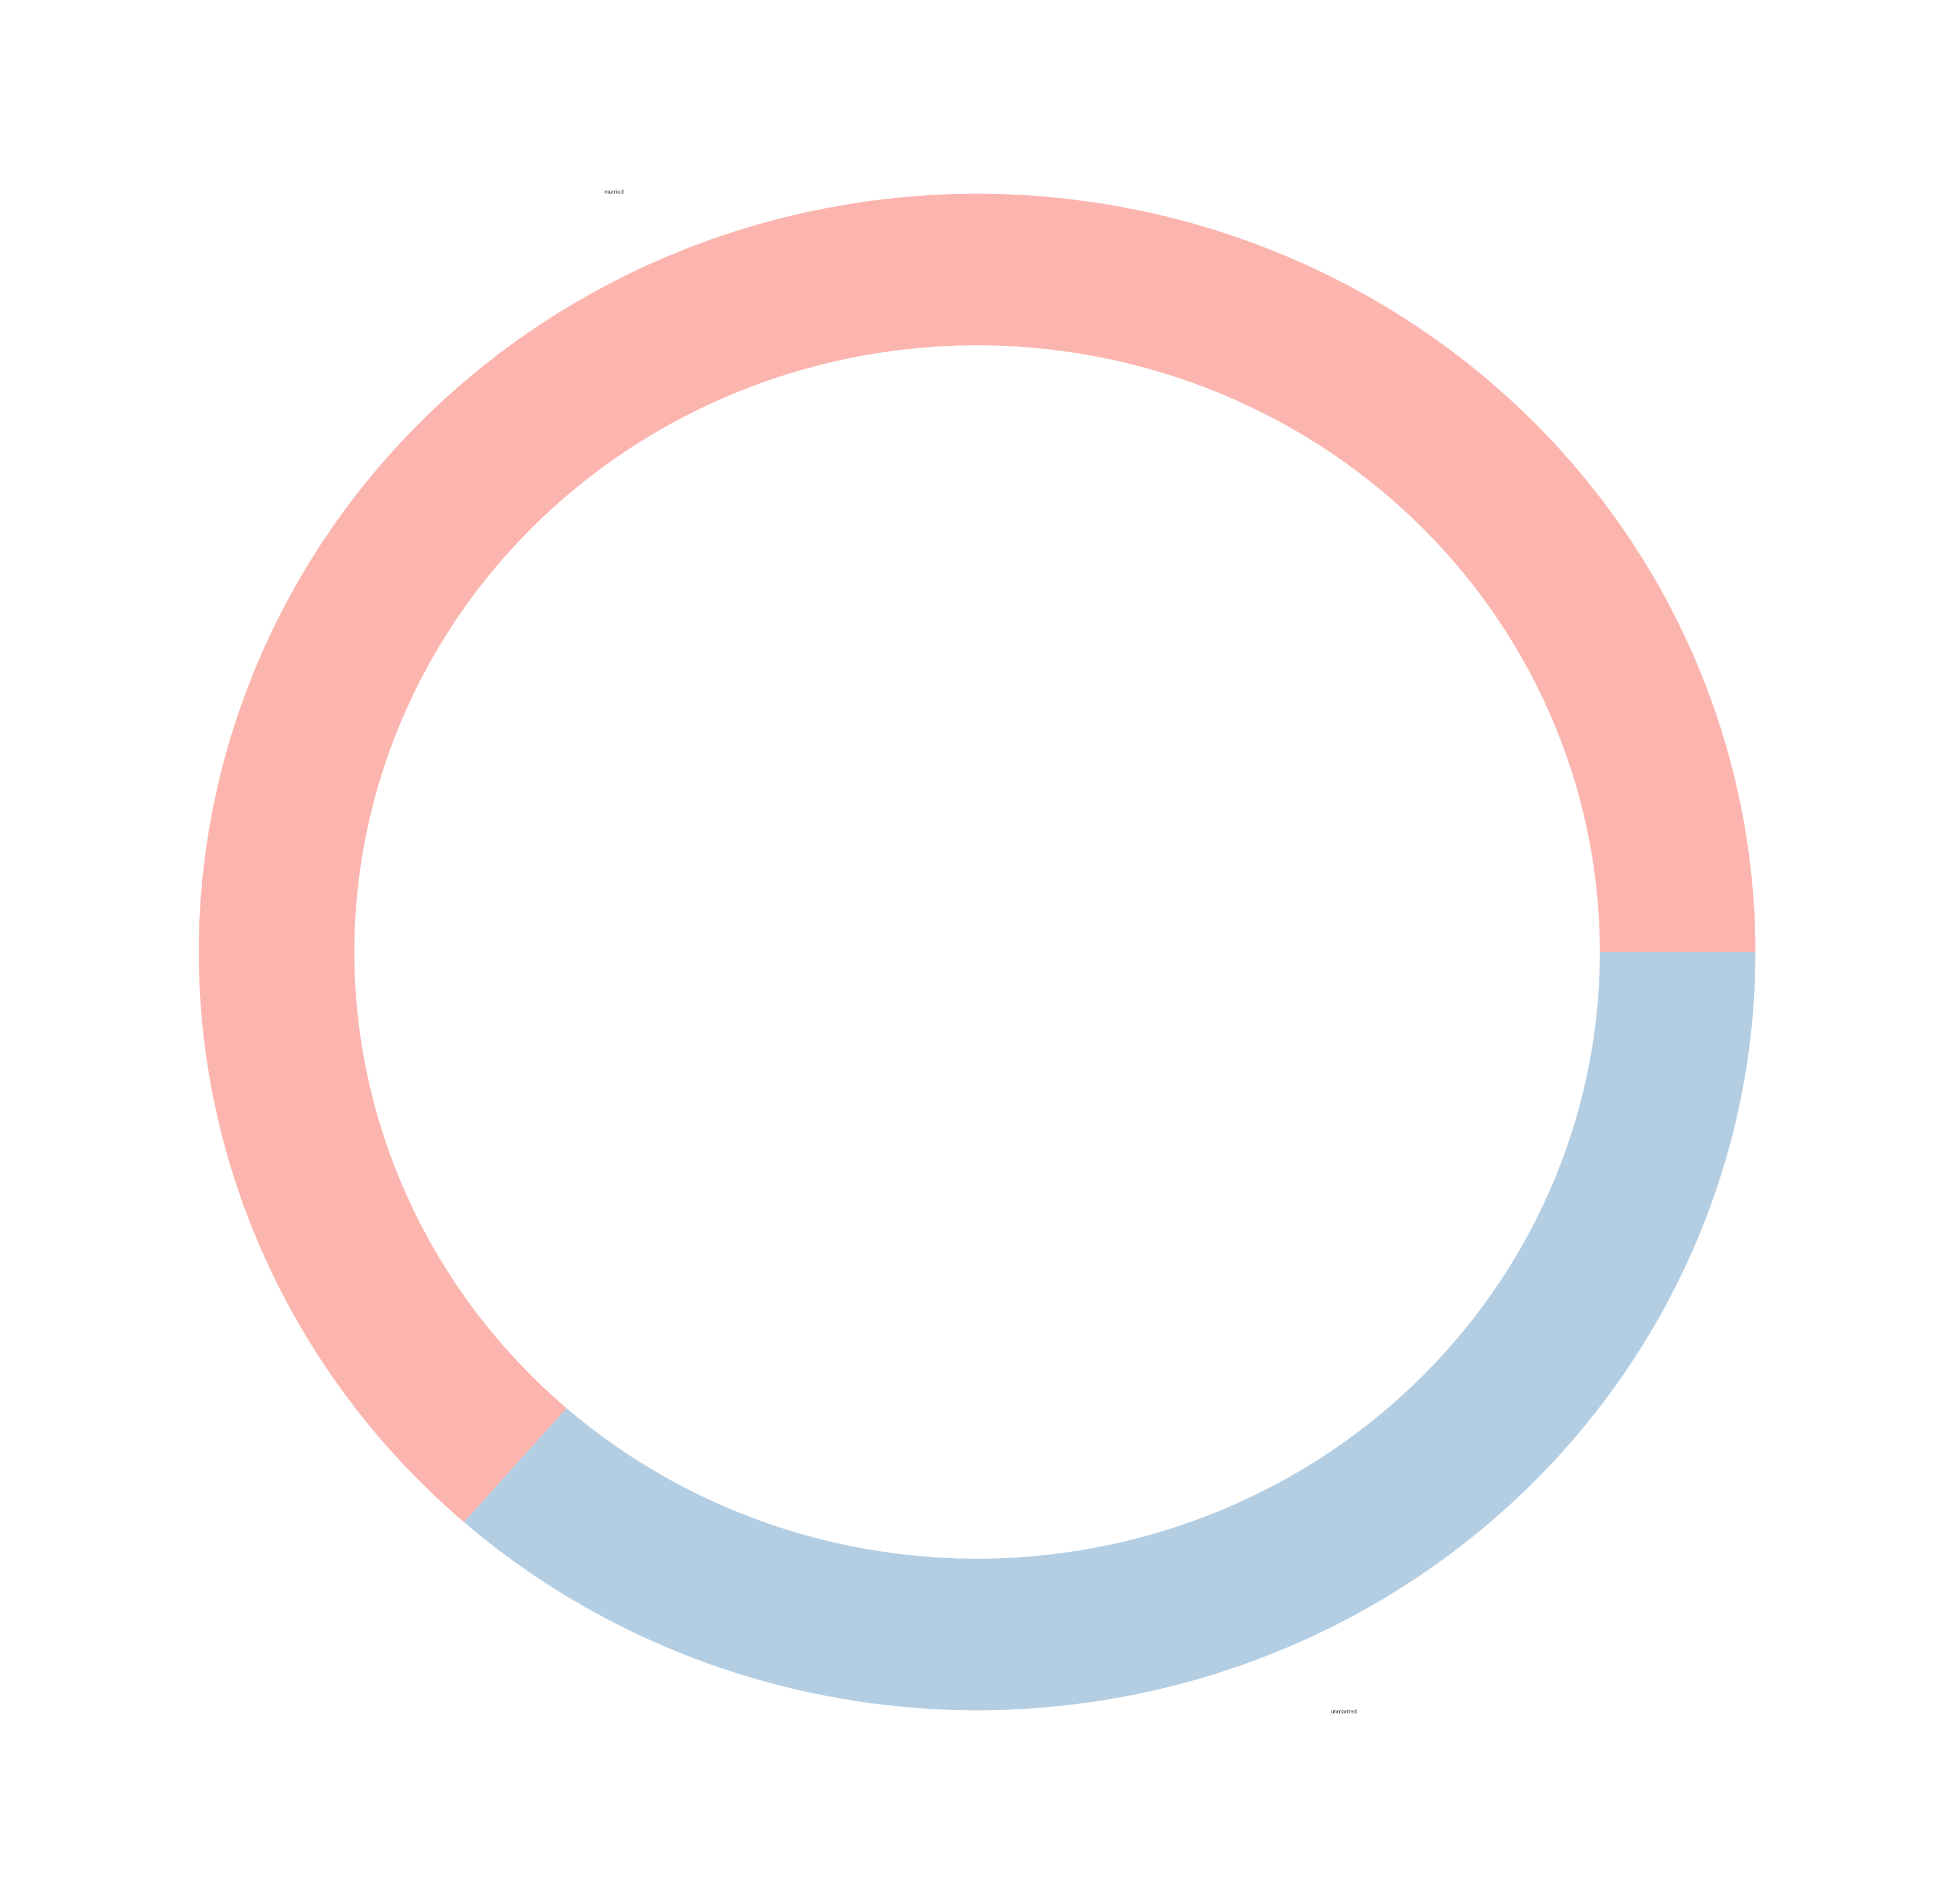

In [476]:
from palettable.colorbrewer.qualitative import Pastel1_7
plt.pie(size, labels=names, colors=Pastel1_7.hex_colors)
p=plt.gcf()

p.gca().add_artist(my_circle)
plt.show()

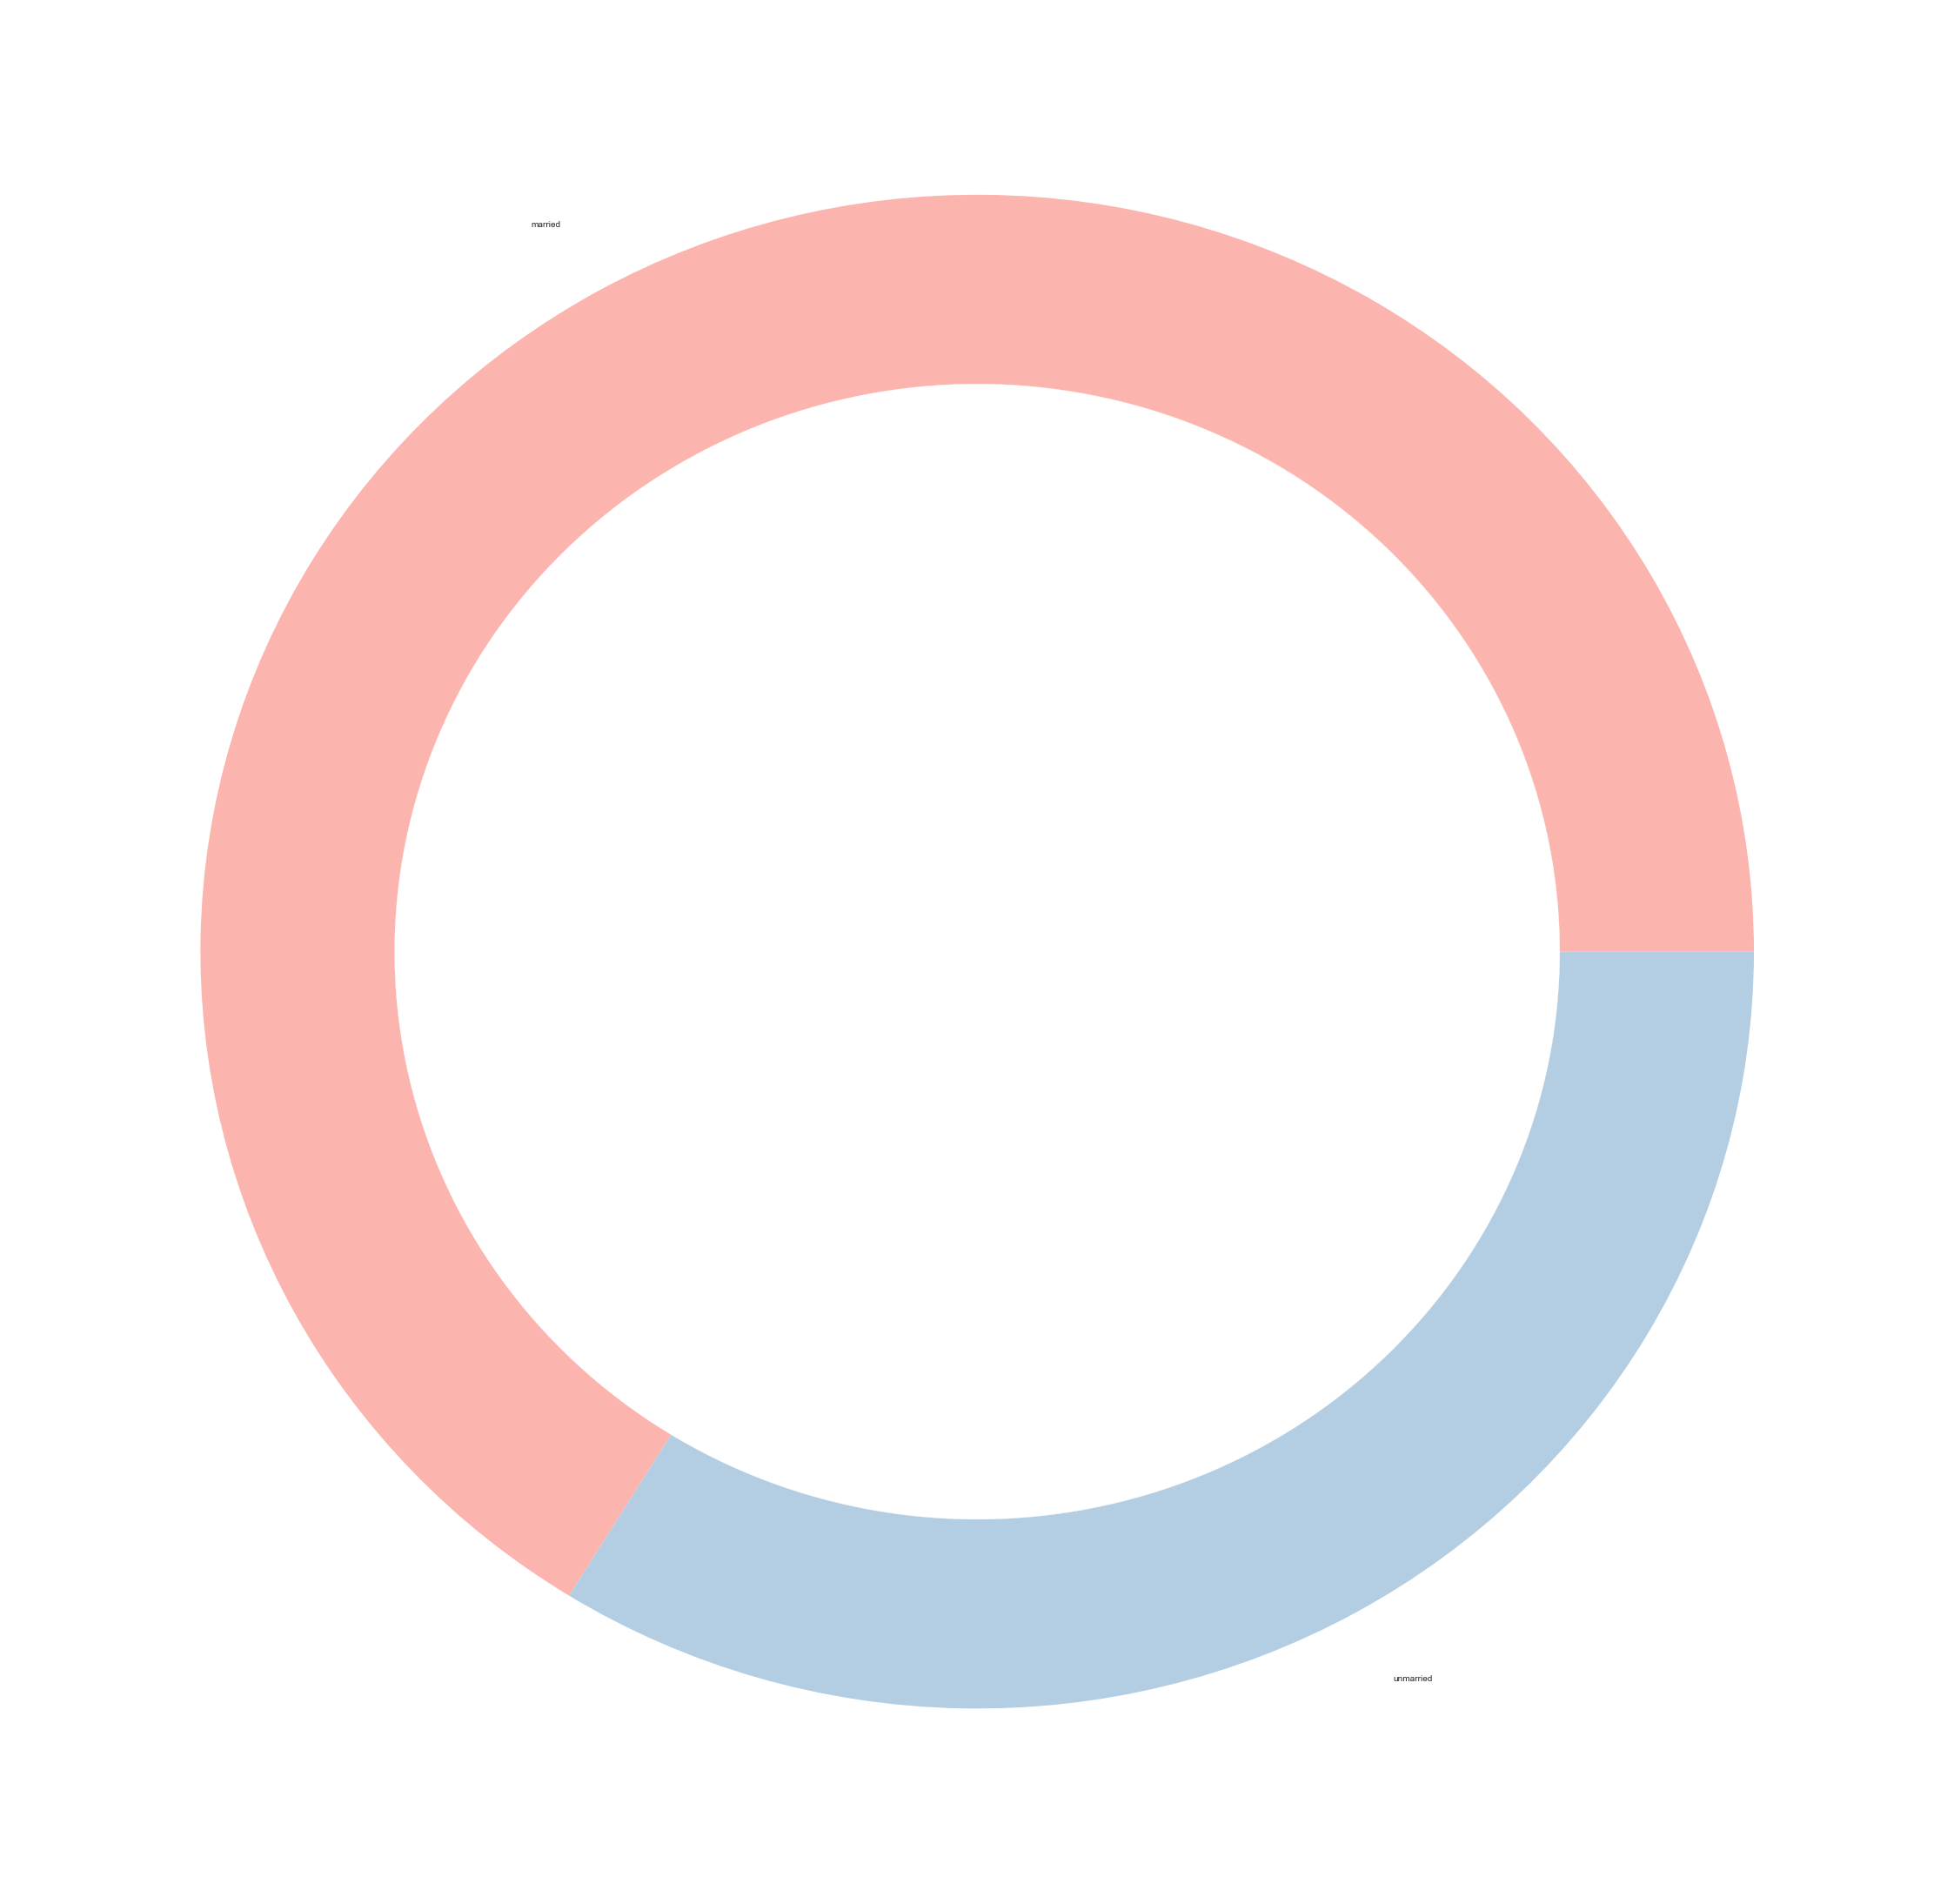

In [688]:
names='married', 'unmarried'
size=[94,48]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.75, color='white')

plt.pie(size, labels=names, colors=Pastel1_7.hex_colors)
p=plt.gcf()

p.gca().add_artist(my_circle)
plt.show()

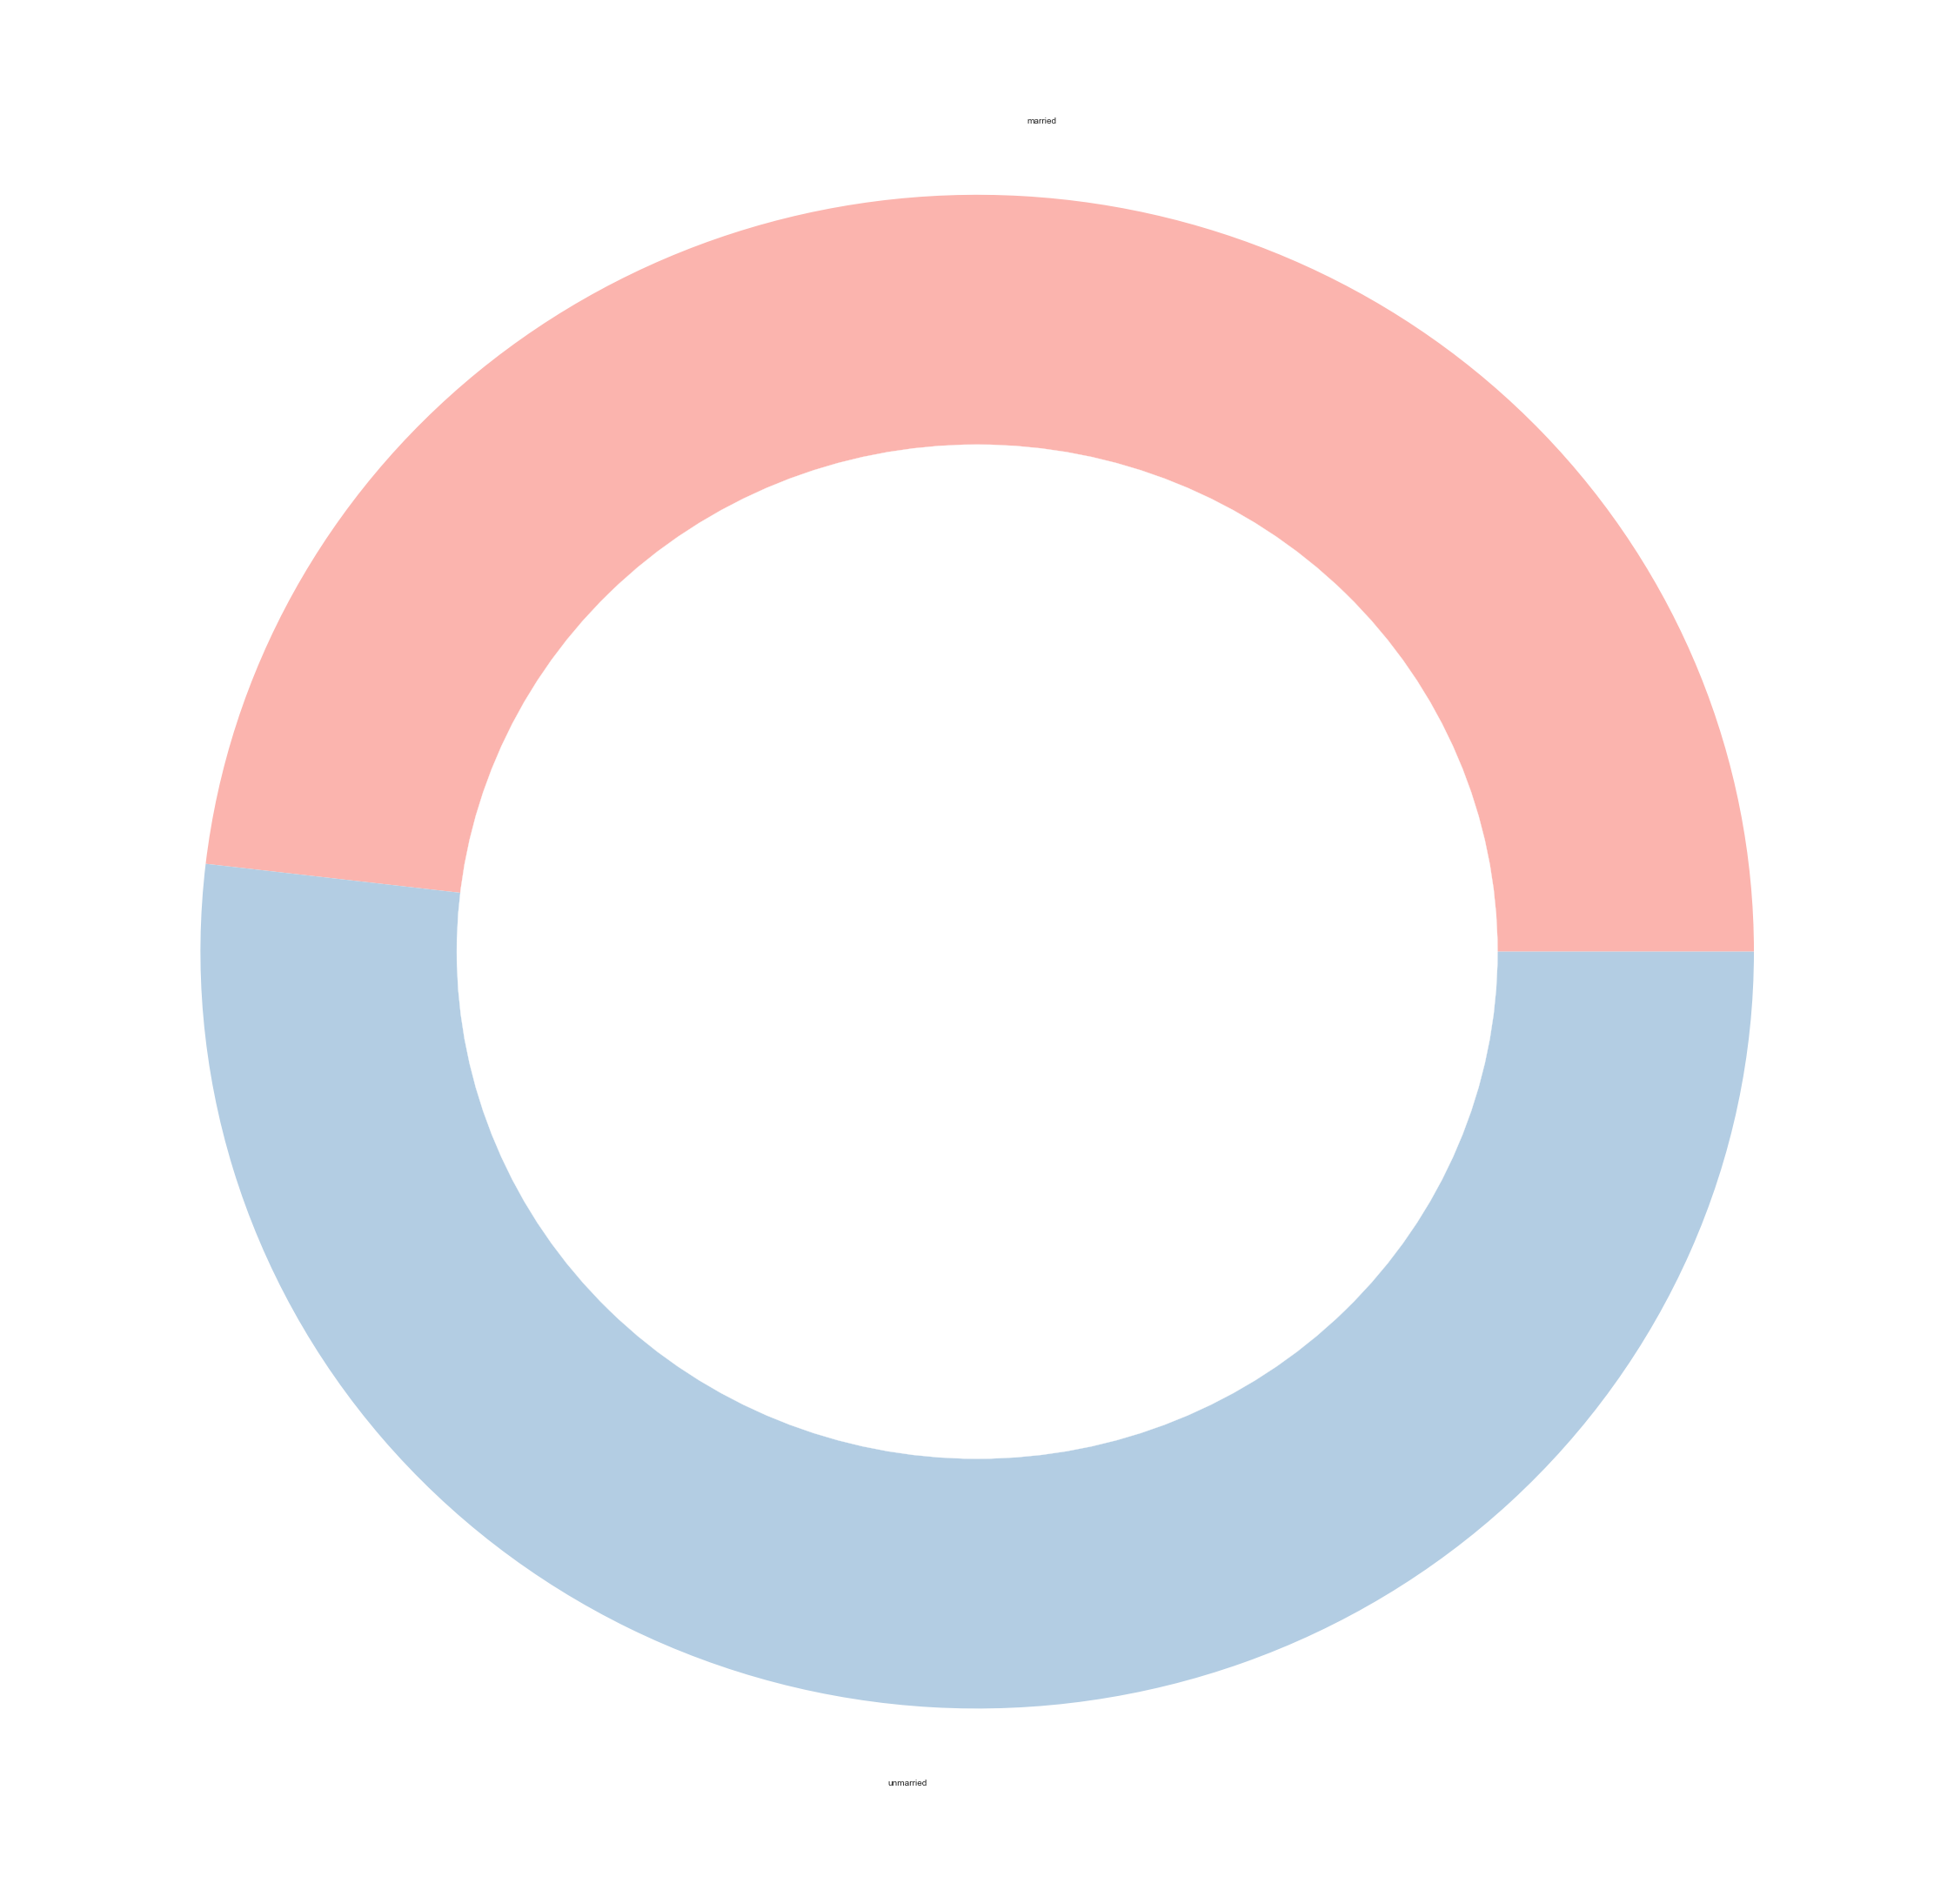

In [689]:
names='married', 'unmarried'
size=[52,56]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.67, color='white')

plt.pie(size, labels=names, colors=Pastel1_7.hex_colors)
p=plt.gcf()

p.gca().add_artist(my_circle)
plt.show()

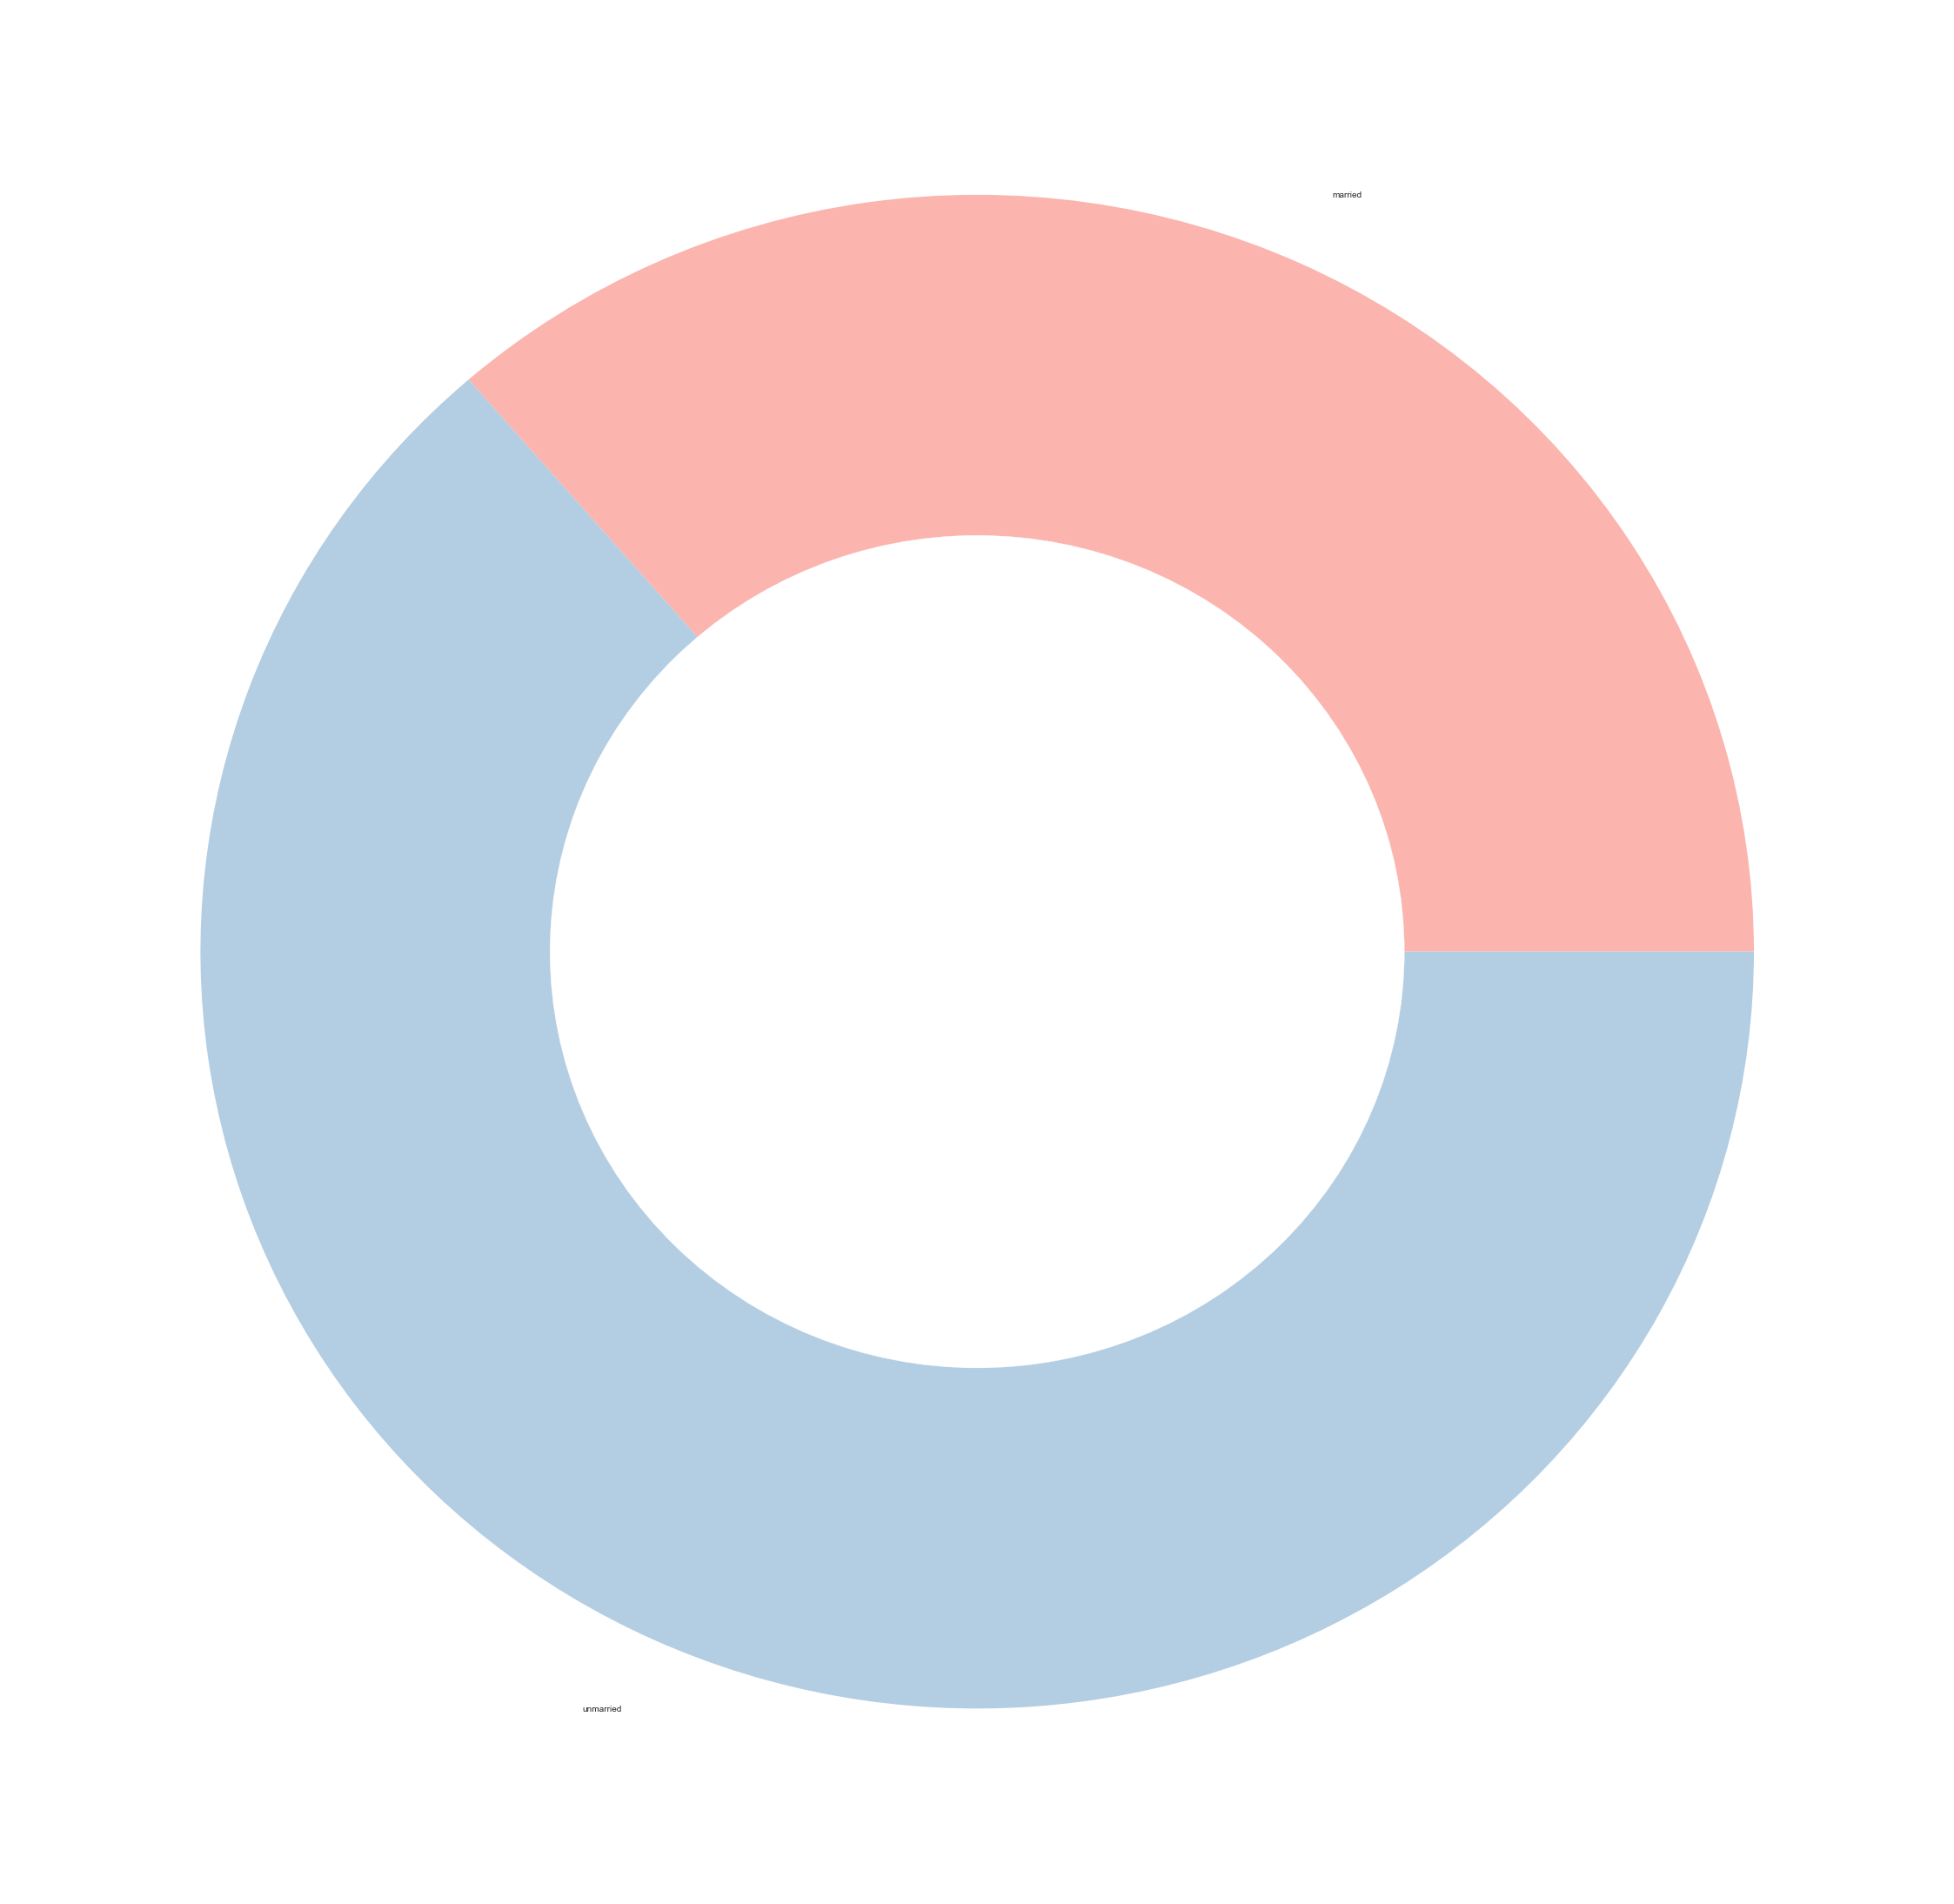

In [694]:
names='married', 'unmarried'
size=[16,28]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.55, color='white')

plt.pie(size, labels=names, colors=Pastel1_7.hex_colors)
p=plt.gcf()

p.gca().add_artist(my_circle)
plt.show()

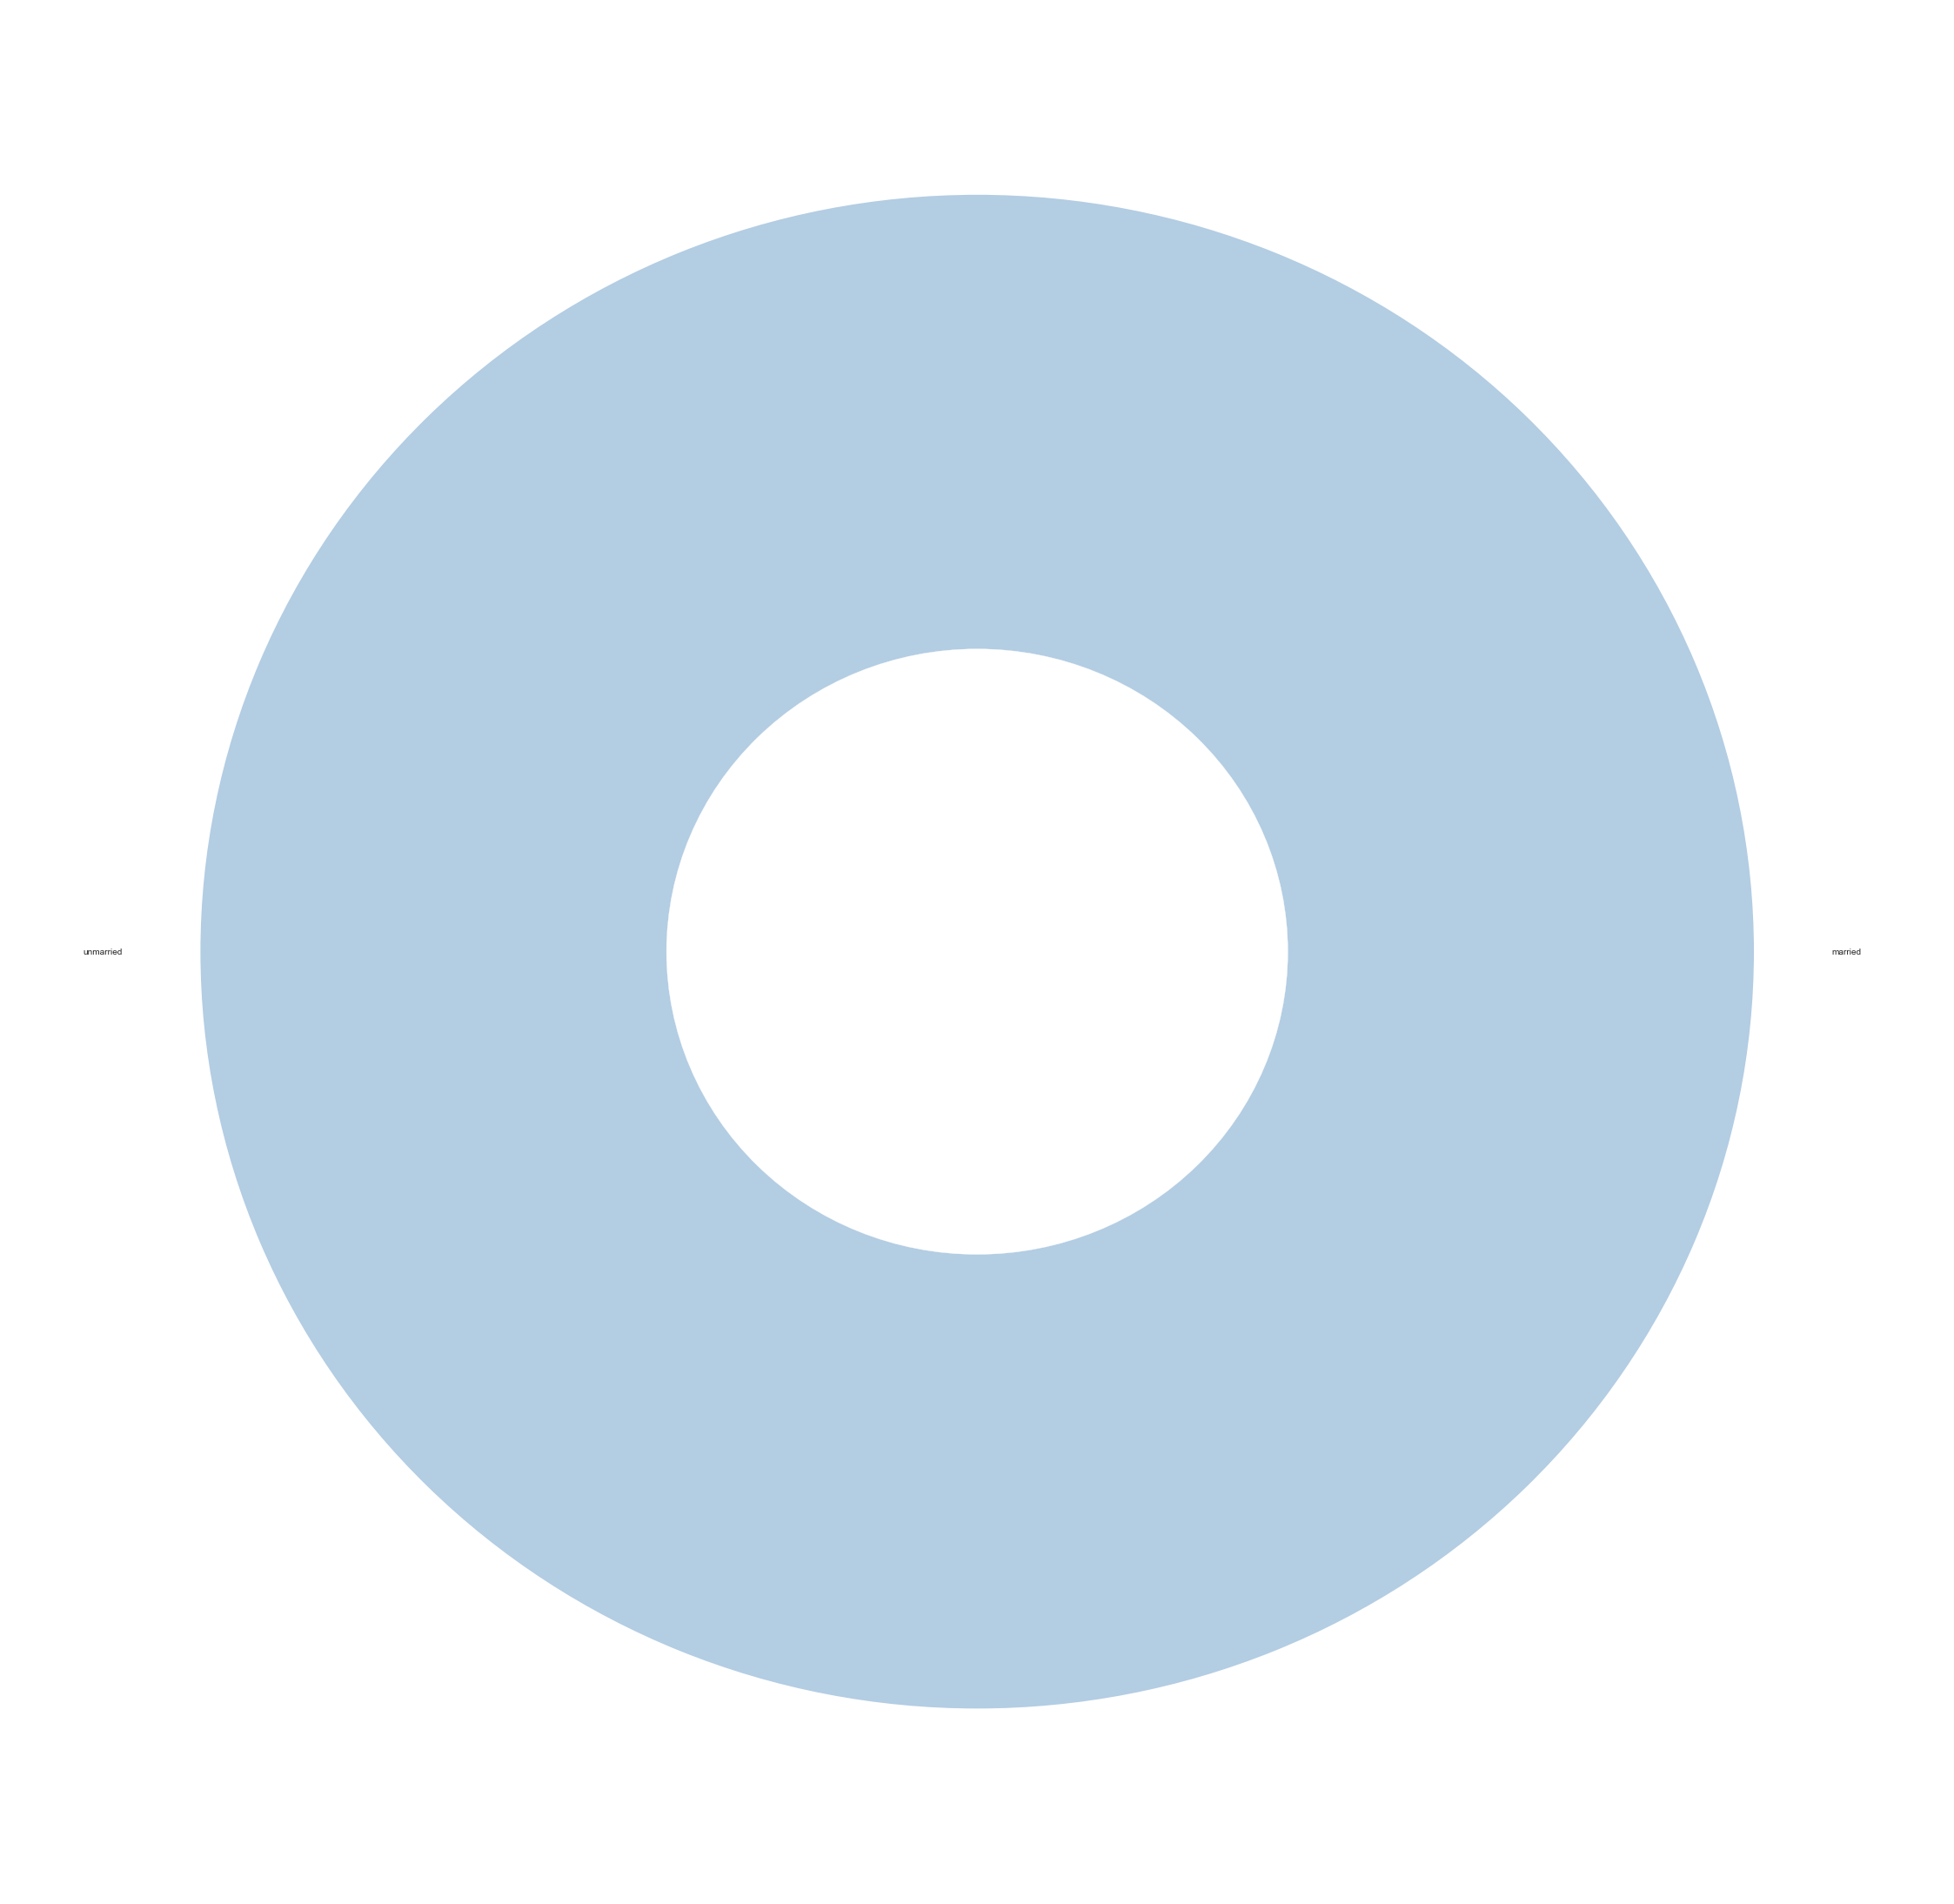

In [691]:
names='married', 'unmarried'
size=[0,1]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.4, color='white')

plt.pie(size, labels=names, colors=Pastel1_7.hex_colors)
p=plt.gcf()

p.gca().add_artist(my_circle)
plt.show()

In [471]:
race_spo1 = race_.groupby(["gender"])["name"].count()
race_spo1 = pd.DataFrame(race_spo1)
race_spo1 = race_spo1.reset_index().sort("name",ascending=0)
race_spo1.reset_index(drop = True)
race_spo1.columns = ['gender', 'Count']
race_spo1

/Users/tianyigu/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


gender  Count
1  Male              628  
0  Female            134  
2  Males             1    
3  Most likely male  1    
4  male              1

In [473]:
spouse_r1 = spouse.groupby("gender").count()["spouse"]
spouse_r1 = pd.DataFrame(spouse_r1)
spouse_r1 = spouse_r1.reset_index().sort("spouse",ascending=0)
spouse_r1.reset_index(drop = True)
spouse_r1.columns = ['gender', 'Count']
spouse_r1

/Users/tianyigu/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


gender  Count
1  Male              338  
0  Female            99   
2  Most likely male  1    
3  male              1

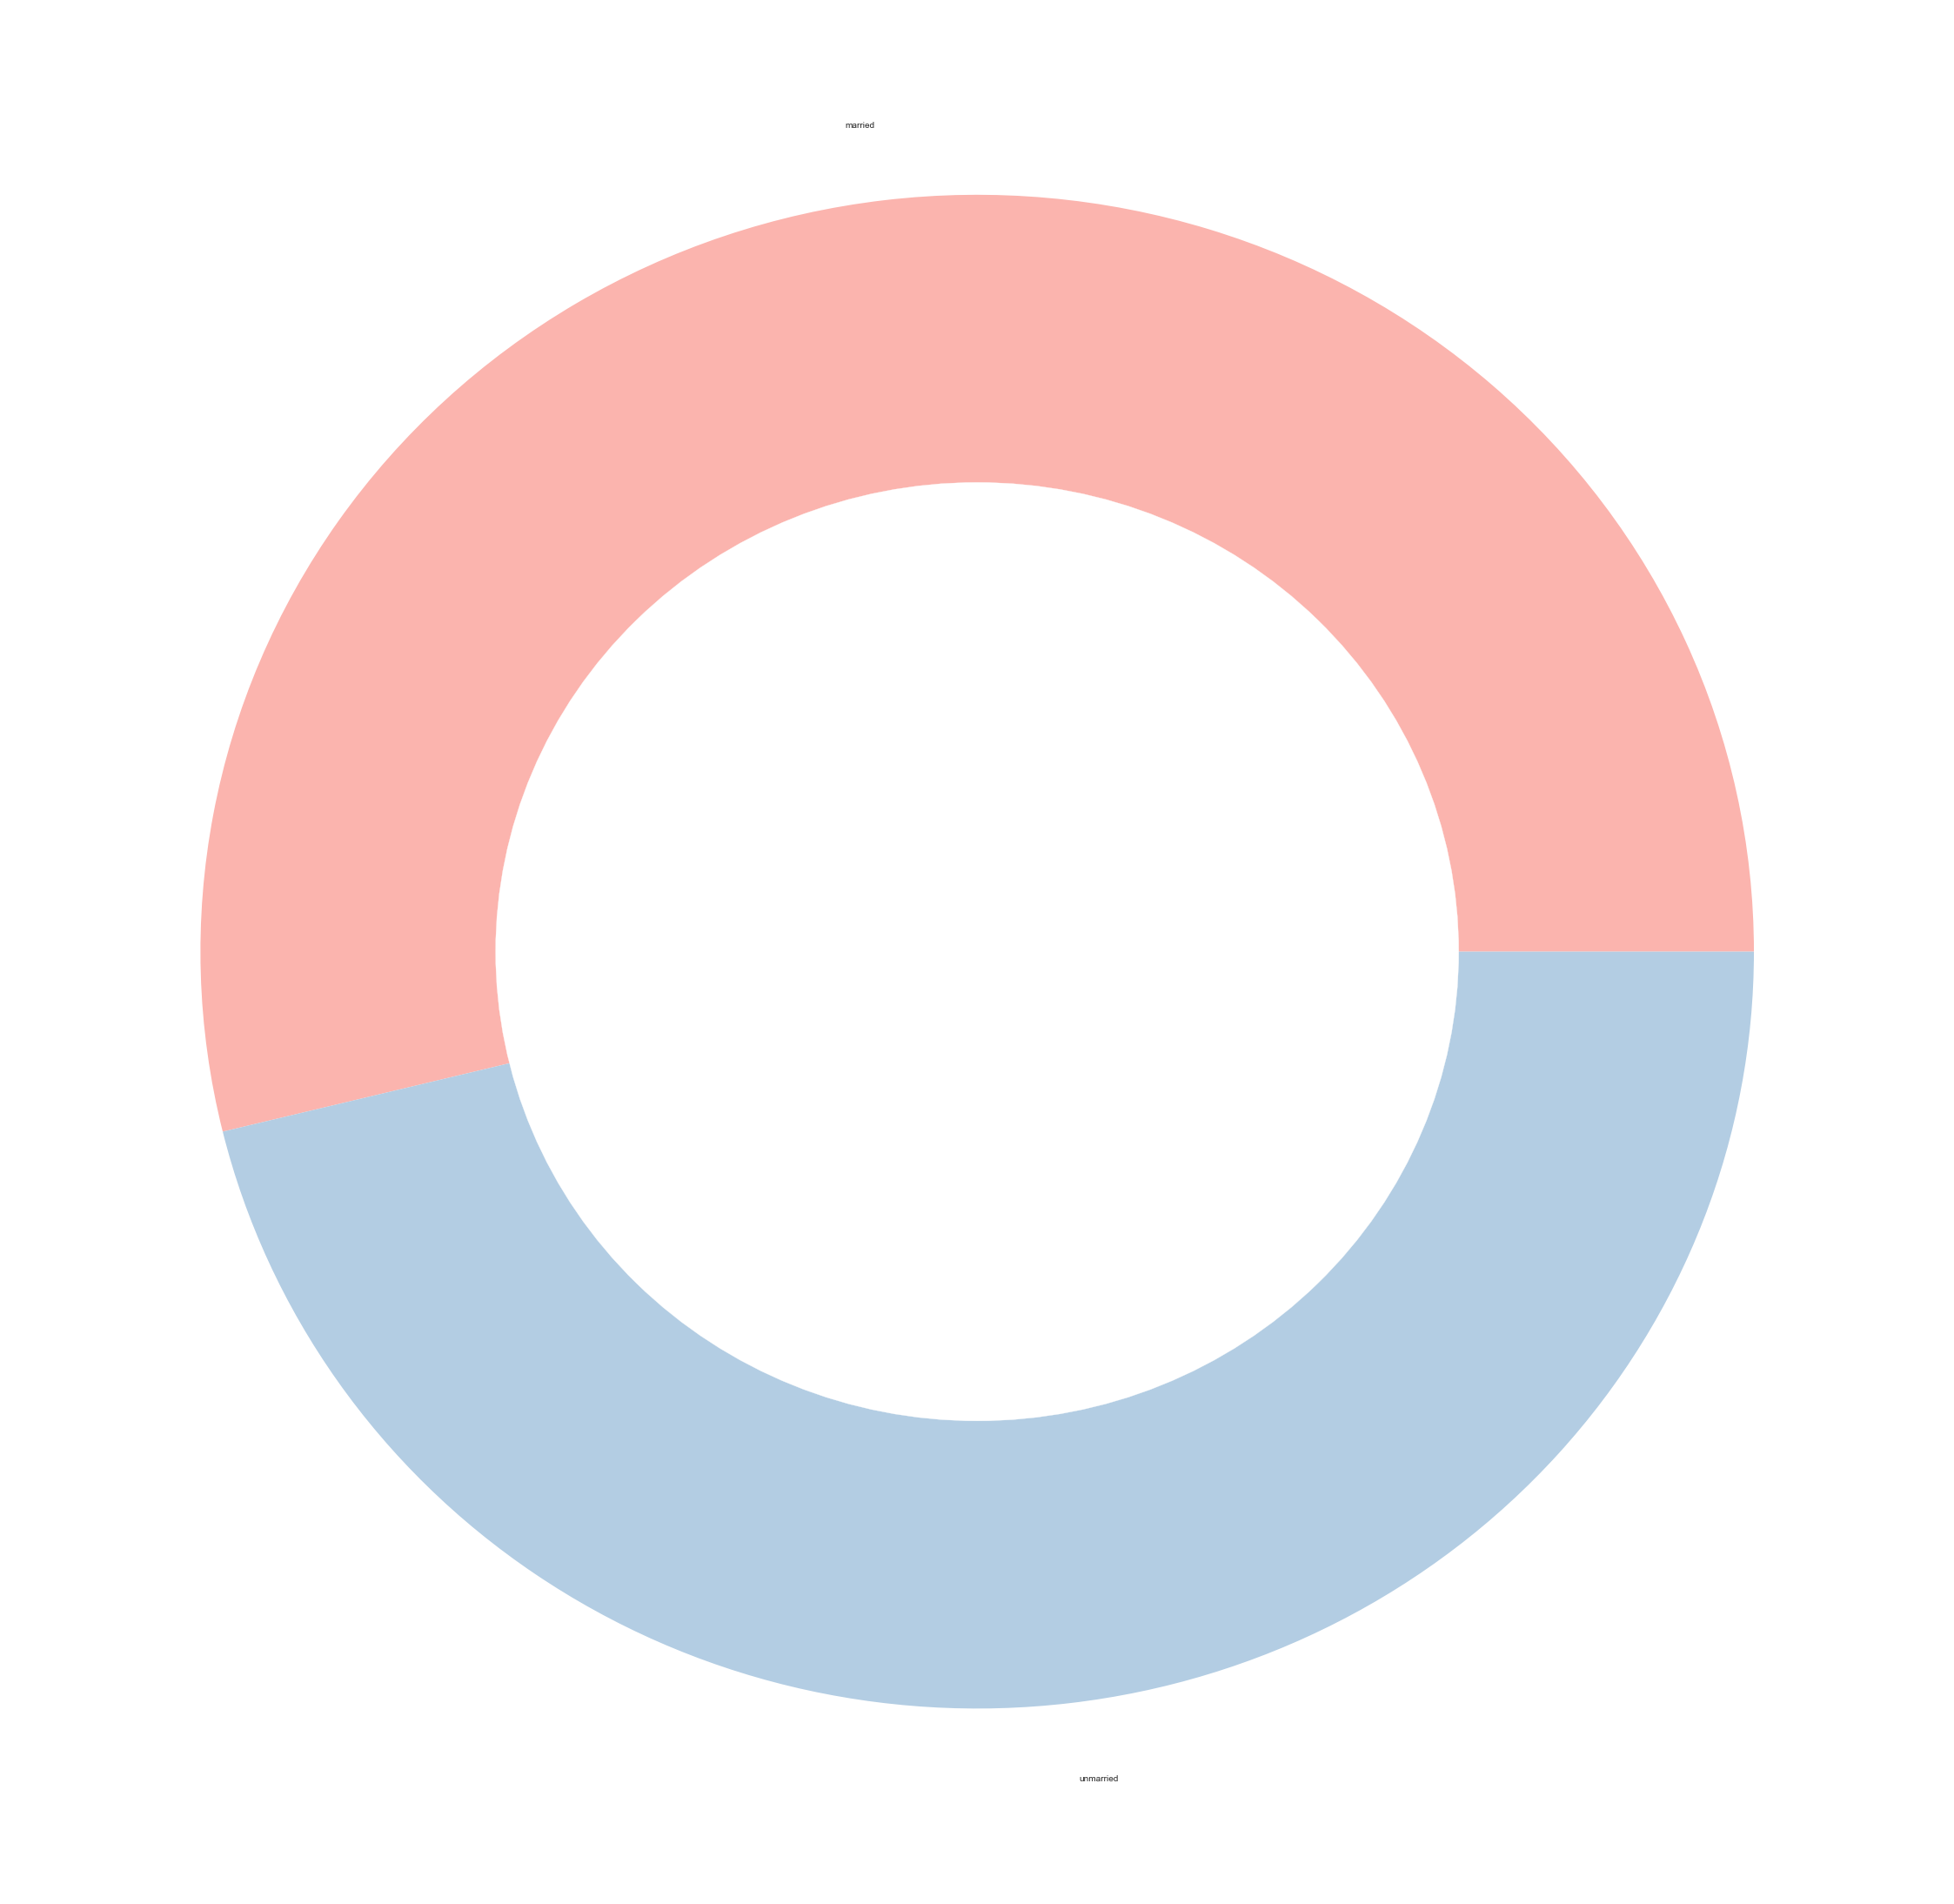

In [700]:
names='married', 'unmarried'
size=[338,290]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.62, color='white')

plt.pie(size, labels=names, colors=Pastel1_7.hex_colors)
p=plt.gcf()

p.gca().add_artist(my_circle)
plt.show()

In [704]:
99/134

0.7388059701492538

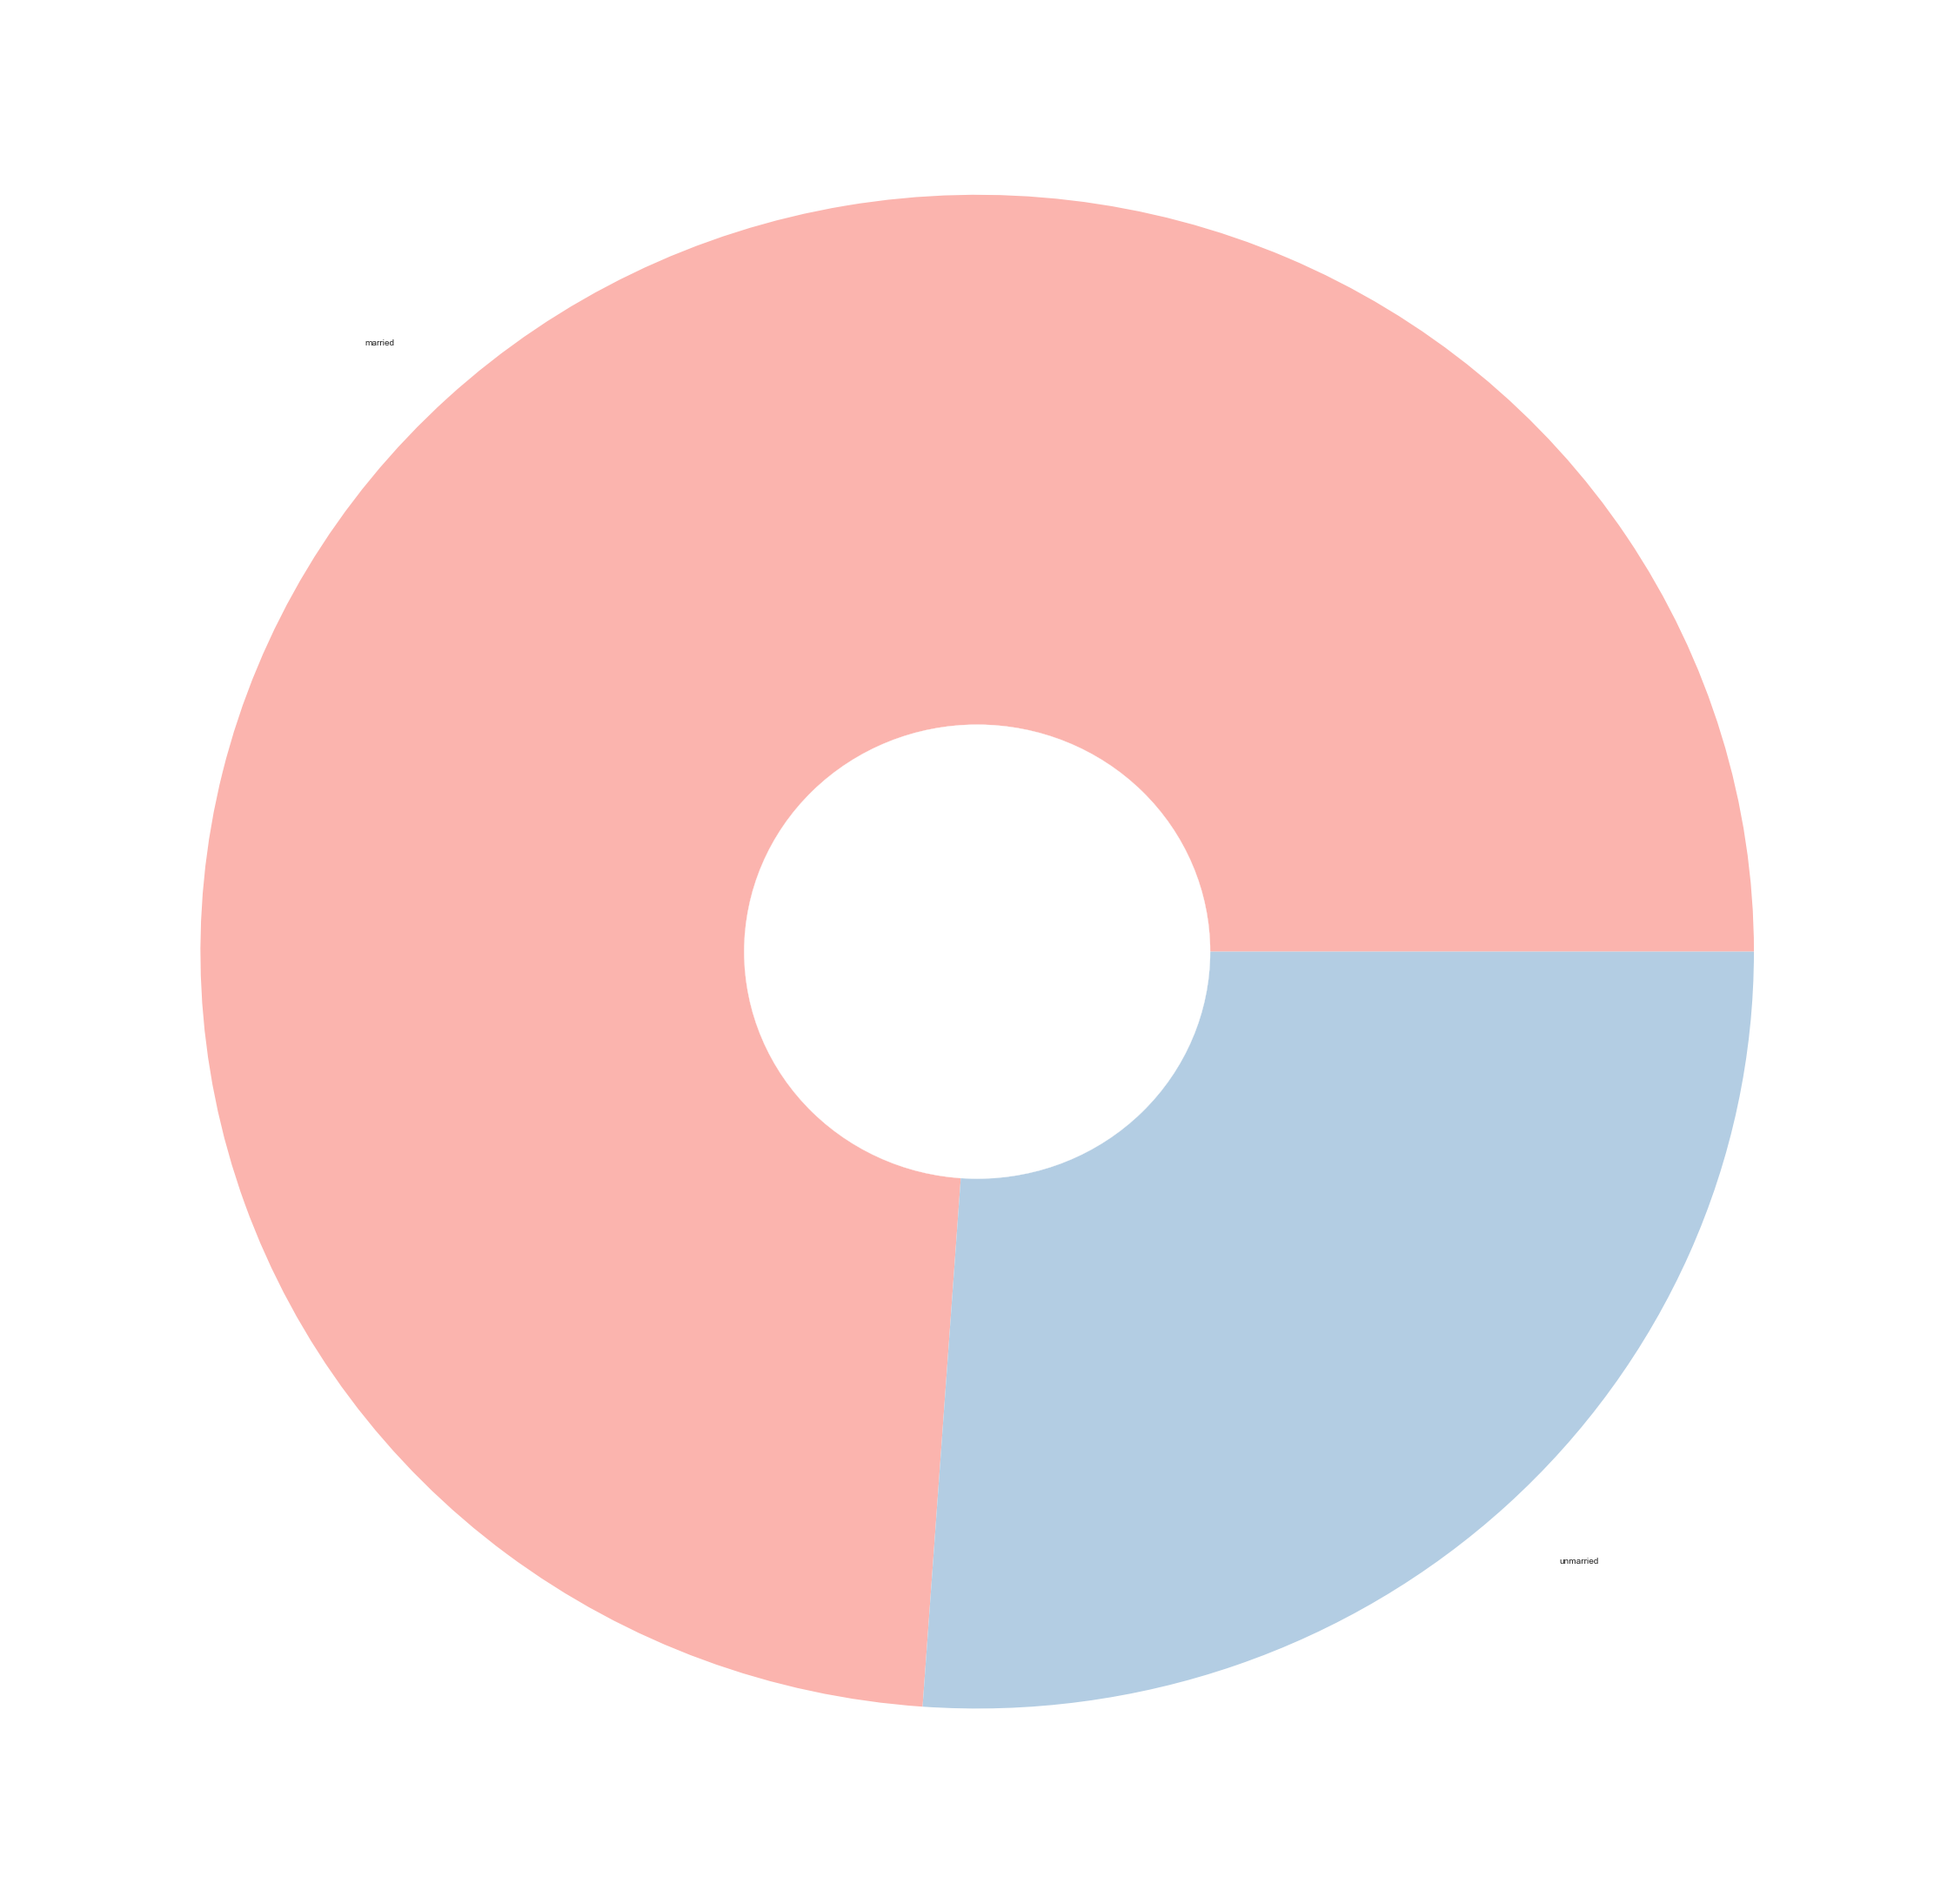

In [701]:
names='married', 'unmarried'
size=[99,35]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.3, color='white')

plt.pie(size, labels=names, colors=Pastel1_7.hex_colors)
p=plt.gcf()

p.gca().add_artist(my_circle)
plt.show()

In [483]:
race_

birth  \
0    NaN                                                                                         
1    TA 2978                                                                                     
2    NaN                                                                                         
3    TA 280                                                                                      
4    NaN                                                                                         
5    SA 2709                                                                                     
6    NaN                                                                                         
7    YT                                                                                          
8    SA 3219                                                                                     
9    SA 3118                                                                                     
10   SA 2876                                                                                     
11   SA 2960                                                                                     
12   TA 2866                                                                                     
13   Late ,Third Age                                                                             
14   Perhaps ,Firstborn                                                                          
15   NaN                                                                                         
16   Early ,First Age                                                                            
17   TA 654                                                                                      
18   SA 2277                                                                                     
19   SA 1320                                                                                     
20   SA 2136                                                                                     
21   SA 1174                                                                                     
22   SA 3035                                                                                     
23   SA 3117                                                                                     
24   SA 1474                                                                                     
25   SA 350                                                                                      
26   SA 2516                                                                                     
27   SA 1800                                                                                     
28   SA 543                                                                                      
29   SA 2618                                                                                     
30   SA 1634                                                                                     
31   SA 1003                                                                                     
32   SA 873                                                                                      
33   SA 1986                                                                                     
34   SA 192                                                                                      
35   SA 2406                                                                                     
36   TA 2922                                                                                     
37   SA 799                                                                                      
38   SA 700                                                                                      
39   YT, and perhaps Firstborn                                                                   
40   YT 1300                                                           

In [493]:
mix = race_[["race","name"]]
mix_ = race_[["race","spouse","name"]]
mix_

race                                                 spouse  \
0    Men            Belemir                                                 
1    Men            NaN                                                     
2    Orcs           NaN                                                     
3    Men            Unnamed wife                                            
4    Dragons        NaN                                                     
5    Men            Unnamed wife                                            
6    Elves          NaN                                                     
7    Elves          Eldalótë                                                
8    Men            Unnamed wife                                            
9    Men            Tar-Míriel                                              
10   Men            Unnamed wife                                            
11   Men            Inzilbêth                                               
12   Men            Unnamed wife                                            
13   Men            NaN                                                     
14   Elves          NaN                                                     
15   Elves          NaN                                                     
16   Elves          NaN                                                     
17   Men            Berúthiel                                               
18   Men            Herucalmo                                               
19   Men            None                                                    
20   Men            Unnamed wife                                            
21   Men            Unnamed wife                                            
22   Men            Unnamed wife                                            
23   Men            Ar-Pharazôn                                             
24   Men            Unnamed wife                                            
25   Men            Unnamed wife                                            
26   Men            Unnamed wife                                            
27   Men            Unnamed wife                                            
28   Men            Almarian                                                
29   Men            Unnamed wife                                            
30   Men            Unnamed wife                                            
31   Men            Unnamed wife                                            
32   Men            Hallacar                                                
33   Men            Unnamed wife                                            
34   Men            Unnamed wife                                            
35   Men            Unnamed wife                                            
36   Men            Thengel                                                 
37   Men            None                                                    
38   Men            Erendis                                                 
39   Elves          Míriel Serindë then ,Indis                              
40   Elves          Loved ,Amarië but they never married                    
41   Elves          NaN                                                     
42   Elves          Anairë                                                  
43   Men            Denethor II                                             
44   Elves          None; betrothed to ,Gwindor, but never married.         
45   Elves          NaN                                                     
46   Men            NaN                                                     
47   Elves          Eärwen                                                  
48   Hobbits        Unnamed wife                                            
49   Men            NaN                                                     
50   Men            NaN                                                     
51   Men  

In [520]:
mix_mer = pd.merge(mix, mix_, how='inner', left_on ='name', right_on ="spouse")
mix_mer ["halfblood"] = np.zeros(len(mix_mer["race_x"]))
mix_mer

race_x                       name_x      race_y  \
0    Men         Adanel                       Men          
1    Elves       Angrod                       Elves        
2    Men         Ar-Pharazôn                  Men          
3    Men         Ar-Gimilzôr                  Men          
4    Men         Tarannon Falastur            Men          
5    Men         Tar-Vanimeldë                Men          
6    Men         Tar-Míriel                   Men          
7    Men         Tar-Meneldur                 Men          
8    Men         Tar-Ancalimë                 Men          
9    Men         Morwen Steelsheen            Men          
10   Men         Tar-Aldarion                 Men          
11   Elves       Finwë                        Elves        
12   Elves       Finwë                        Elves        
13   Elves       Fingolfin                    Elves        
14   Elves       Finduilas                    Men          
15   Elves       Finarfin                     Elves        
16   Men         Faramir                      Men          
17   Men         Silmariën                    Men          
18   Hobbits     Lobelia Sackville-Baggins    Hobbits      
19   Men         Rían                         Men          
20   Hobbits     Rufus Burrows                Hobbits      
21   Hobbits     Odo Proudfoot                Hobbits      
22   Hobbits     Mrs. Proudfoot               Hobbits      
23   Men         Ivorwen                      Men          
24   Ainur       Irmo                         Ainur        
25   Men         Inzilbêth                    Men          
26   Men         Imrazôr                      Elves        
27   Elves       Iminyë                       Elves        
28   Elves       Imin                         Elves        
29   Men         Huor                         Men          
30   Elves       Eöl                          Elves        
31   Elves       Eärwen                       Elves        
32   Half-elven  Eärendil                     Half-elven   
33   Ainur       Estë                         Ainur        
34   Men         Erendis                      Men          
35   Men         Éowyn                        Men          
36   Men         Éomer                        Men          
37   Elves       Enelyë                       Elves        
38   Elves       Enel                         Elves        
39   Men         Emeldir                      Men          
40   Half-elven  Elwing                       Half-elven   
41   Half-elven  Elrond                       Elves        
42   Men         Elfhild                      Men          
43   Elves       Elenwë                       Elves        
44   Elves       Eldalótë                     Elves        
45   Men         Elatan                       Men          
46   Men         Eilinel                      Men          
47   Men         Dírhael                      Men          
48   Hobbits     Otho Sackville-Baggins       Hobbits      
49   Men         Orchaldor                    Men          
50   Men         Herucalmo                    Men          
51   Men         Hareth                       Men          
52   Men         Handir                       Men          
53   Men         Hallacar                     Men          
54   Men         Denethor II                  Men          
55   Ainur       Yavanna                      Ainur        
56   Hobbits     Odovacar Bolger              Men          
57   Hobbits     Rollo Boffin                 Hobbits      
58   Hobbits     Hugo Boffin                  Hobbits      
59   Hobbits     Griffo Boffin                Hobbits      
60   Hobbits     Buffo Boffin                 Hobbits      
61   Men         Berúthiel                    Men          
62   Elves       Nimrodel                     Elves        
63   Ainur       Nessa                        Ainur        
64   Elves       Nerdanel                     Elves        
65   Elves       Mithrellas                   Men

In [523]:
for i in range(len(mix_mer["race_x"])):
    if mix_mer["race_x"][i]== mix_mer["race_y"][i]:
        mix_mer ["halfblood"][i] = False
    else:
        mix_mer ["halfblood"][i] = True

/Users/tianyigu/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/tianyigu/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [540]:
mix_final = mix_mer[mix_mer.halfblood == True]
mix_final['halfblood'] = mix_final.name_y.map(lambda x:x not in list(mix_final["name_x"]))

/Users/tianyigu/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [541]:
mix_final = mix_final.reset_index(drop=True)
mix_final = mix_final.loc[[0,1,2,3,5,7,8]]
mix_final

race_x           name_x race_y           spouse  \
0  Elves       Finduilas        Men    Finduilas         
1  Men         Imrazôr          Elves  Imrazôr           
2  Half-elven  Elrond           Elves  Elrond            
3  Hobbits     Odovacar Bolger  Men    Odovacar Bolger   
5  Ainur       Melian           Elves  Melian            
7  Ainur       Vairë            Elves  Vairë             
8  Men         Tuor             Elves  Tuor              

                    name_y halfblood  
0  Denethor II              True      
1  Mithrellas               False     
2  Celebrían                False     
3  Rosamunda (Took) Bolger  True      
5  Thingol                  False     
7  Lindo                    True      
8  Idril                    True

In [547]:
a = {'race' : ["Elf and Men", "Half elf and Elf", 'Hobbits and Men', "Ainur and Elf"], 'count':[3,1,1,2]}
mix__ = pd.DataFrame(a)
mix__

count              race
0  3      Elf and Men     
1  1      Half elf and Elf
2  1      Hobbits and Men 
3  2      Ainur and Elf

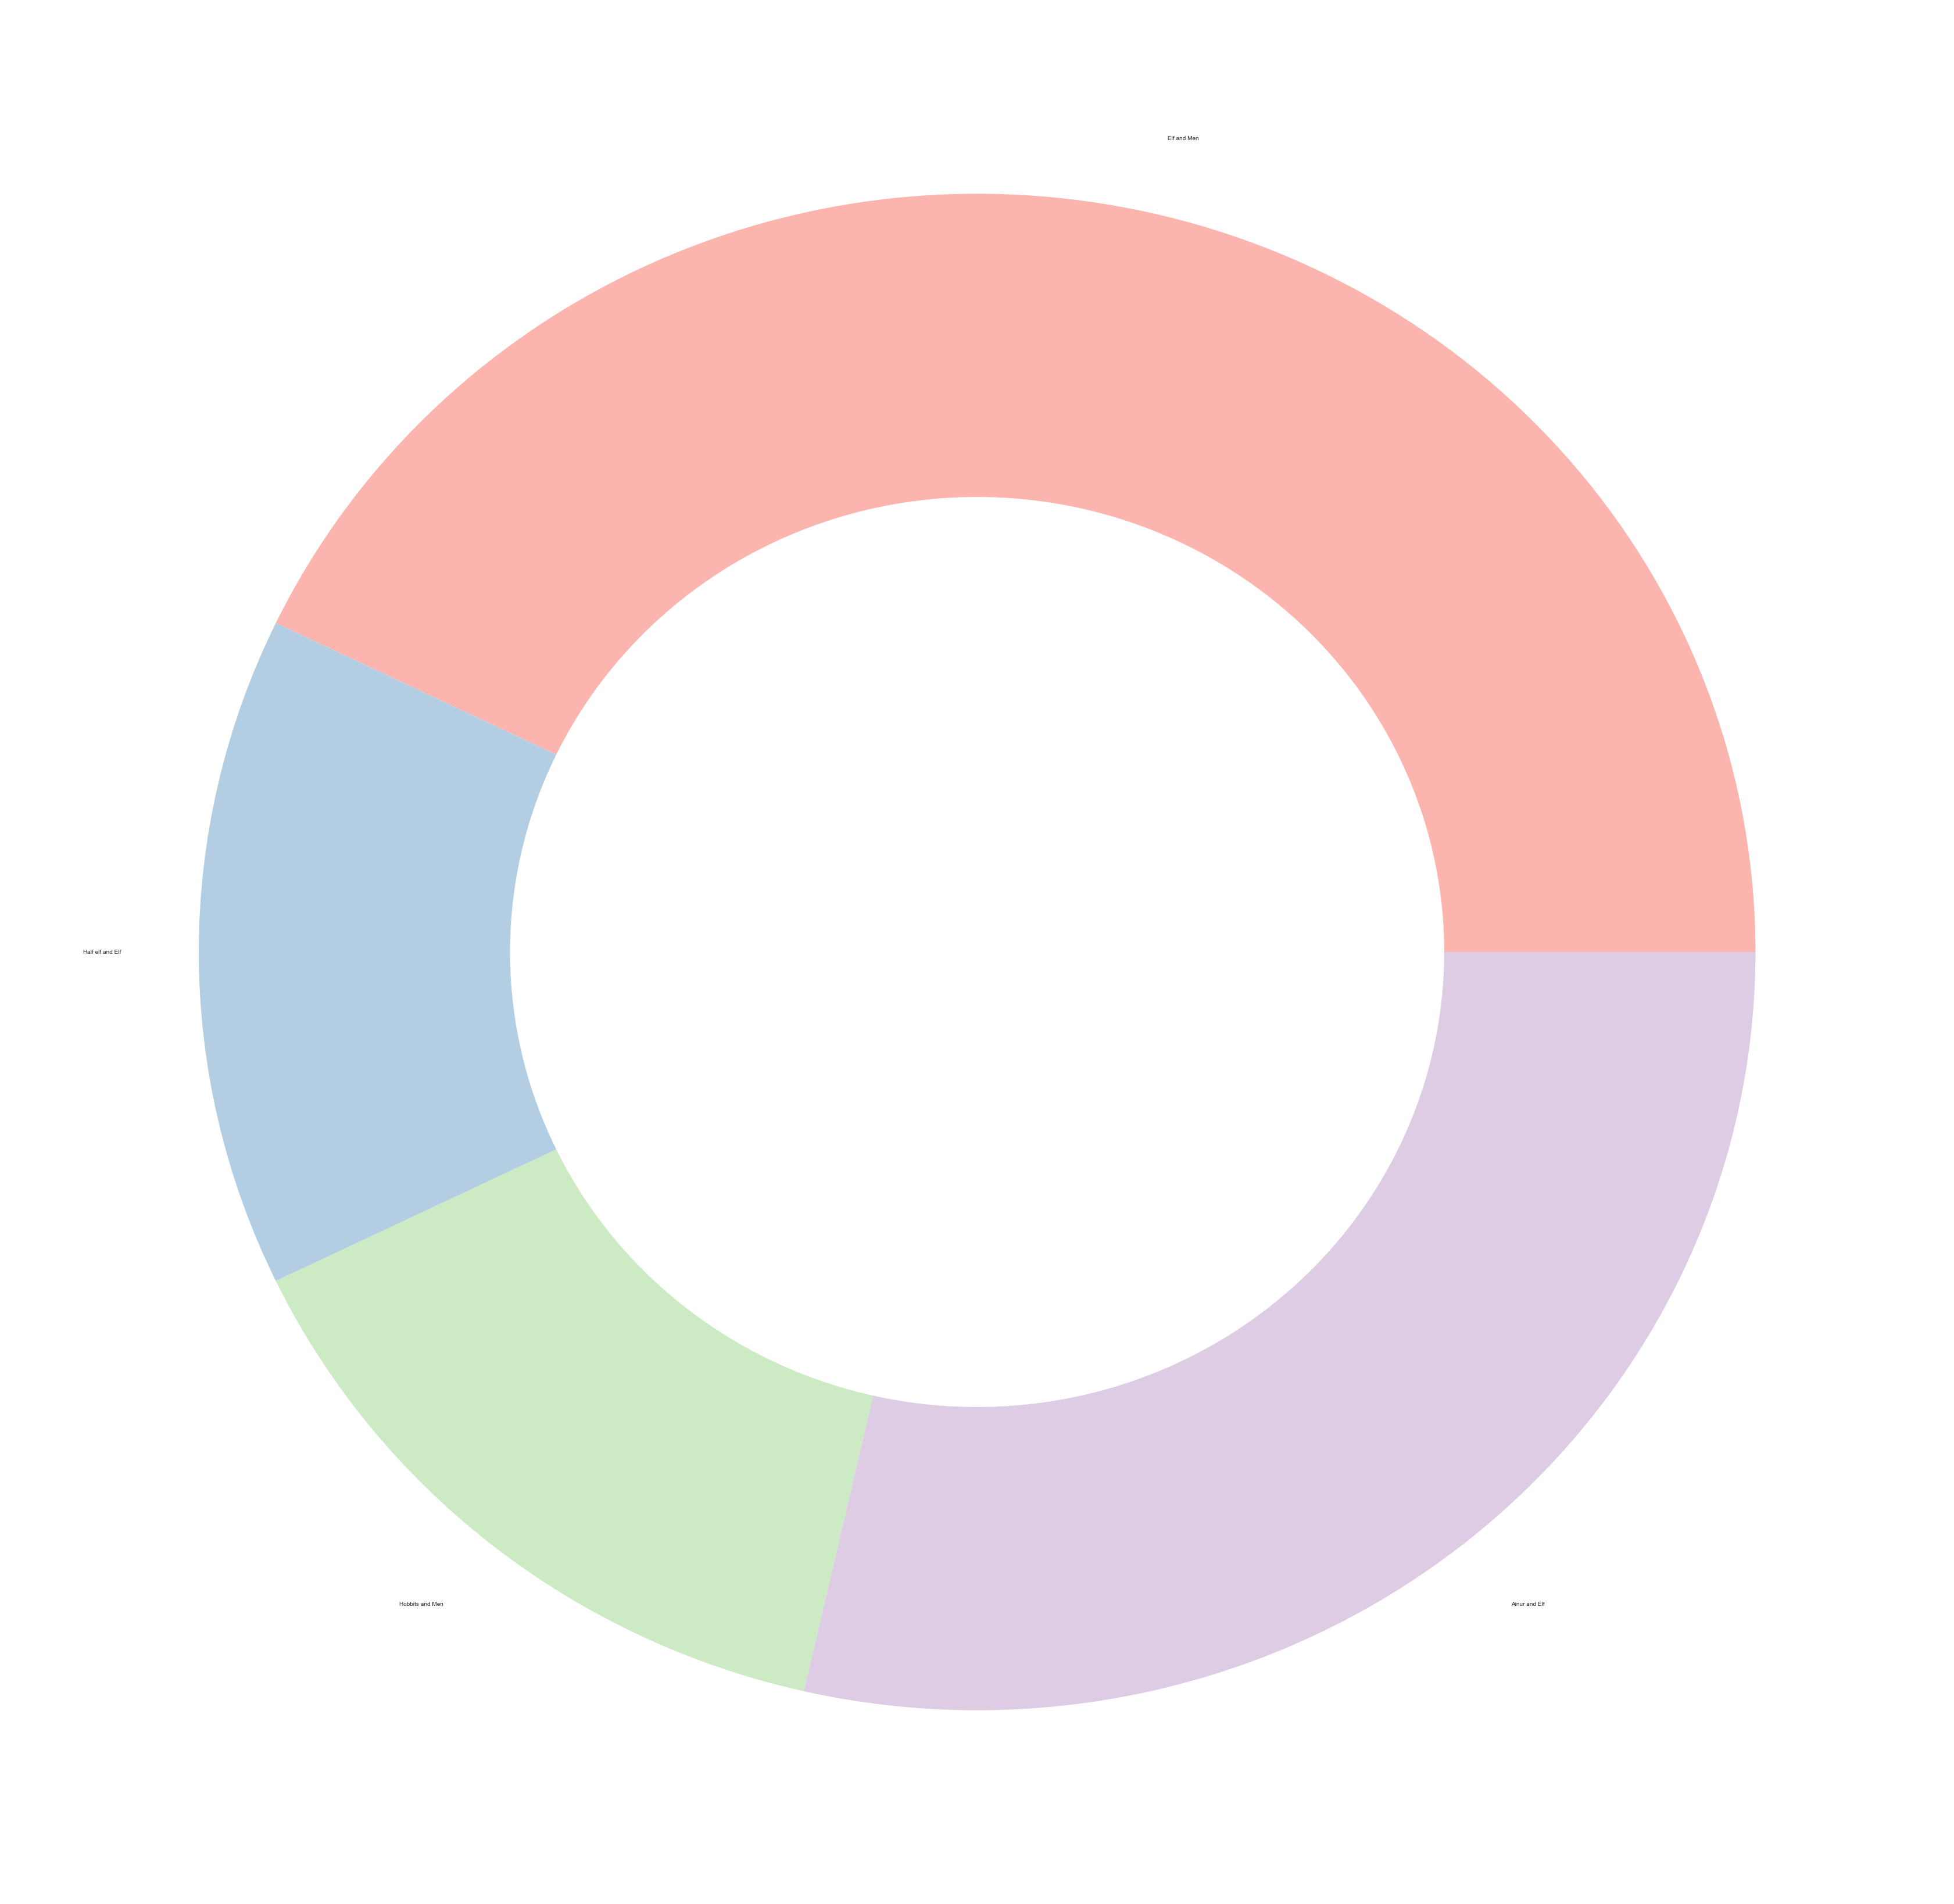

In [549]:
names="Elf and Men", "Half elf and Elf", 'Hobbits and Men', "Ainur and Elf"
size=[3,1,1,2]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.6, color='white')

plt.pie(size, labels=names, colors=Pastel1_7.hex_colors)
p=plt.gcf()

p.gca().add_artist(my_circle)
plt.show()


In [550]:
ratio = 7/120
ratio

0.058333333333333334

In [551]:
gend = race_[["gender","name"]]
gend_ = race_[["gender","spouse","name"]]
gend_

gender                                                 spouse  \
0    Female            Belemir                                                 
1    Male              NaN                                                     
2    Male              NaN                                                     
3    Male              Unnamed wife                                            
4    Male              NaN                                                     
5    Male              Unnamed wife                                            
6    Male              NaN                                                     
7    Male              Eldalótë                                                
8    Male              Unnamed wife                                            
9    Male              Tar-Míriel                                              
10   Male              Unnamed wife                                            
11   Male              Inzilbêth                                               
12   Male              Unnamed wife                                            
13   Male              NaN                                                     
14   NaN               NaN                                                     
15   Male              NaN                                                     
16   Male              NaN                                                     
17   Male              Berúthiel                                               
18   Female            Herucalmo                                               
19   Female            None                                                    
20   Male              Unnamed wife                                            
21   Male              Unnamed wife                                            
22   Male              Unnamed wife                                            
23   Female            Ar-Pharazôn                                             
24   Male              Unnamed wife                                            
25   Male              Unnamed wife                                            
26   Male              Unnamed wife                                            
27   Male              Unnamed wife                                            
28   Male              Almarian                                                
29   Male              Unnamed wife                                            
30   Male              Unnamed wife                                            
31   Male              Unnamed wife                                            
32   Female            Hallacar                                                
33   Male              Unnamed wife                                            
34   Male              Unnamed wife                                            
35   Male              Unnamed wife                                            
36   Female            Thengel                                                 
37   Male              None                                                    
38   Male              Erendis                                                 
39   Male              Míriel Serindë then ,Indis                              
40   Male              Loved ,Amarië but they never married                    
41   Male              NaN                                                     
42   Male              Anairë                                                  
43   Female            Denethor II                                             
44   Female            None; betrothed to ,Gwindor, but never married.         
45   Female            NaN                                                     
46   Male              NaN                                                     
47   Male              Eärwen                                                  
48   Male              Unnamed wife                                            
49   Male      

In [554]:
gend_mer = pd.merge(gend, gend_, how='inner', left_on ='name', right_on ="spouse")
gend_mer ["same"] = np.zeros(len(gend_mer["gender_x"]))
gend_mer 

gender_x                       name_x gender_y  \
0    Female   Adanel                       Male      
1    Male     Angrod                       Female    
2    Male     Ar-Pharazôn                  Female    
3    Male     Ar-Gimilzôr                  Female    
4    Male     Tarannon Falastur            Female    
5    Female   Tar-Vanimeldë                Male      
6    Female   Tar-Míriel                   Male      
7    Male     Tar-Meneldur                 Female    
8    Female   Tar-Ancalimë                 Male      
9    Female   Morwen Steelsheen            Male      
10   Male     Tar-Aldarion                 Female    
11   Male     Finwë                        Female    
12   Male     Finwë                        Female    
13   Male     Fingolfin                    Female    
14   Female   Finduilas                    Male      
15   Male     Finarfin                     Female    
16   Male     Faramir                      Female    
17   Female   Silmariën                    Male      
18   Female   Lobelia Sackville-Baggins    Male      
19   Female   Rían                         Male      
20   Male     Rufus Burrows                Female    
21   Male     Odo Proudfoot                Female    
22   Female   Mrs. Proudfoot               Male      
23   Female   Ivorwen                      Male      
24   Male     Irmo                         Female    
25   Female   Inzilbêth                    Male      
26   Male     Imrazôr                      Female    
27   Female   Iminyë                       Male      
28   Male     Imin                         Female    
29   Male     Huor                         Female    
30   Male     Eöl                          Female    
31   Female   Eärwen                       Male      
32   Male     Eärendil                     Female    
33   Female   Estë                         Male      
34   Female   Erendis                      Male      
35   Female   Éowyn                        Male      
36   Male     Éomer                        Female    
37   Female   Enelyë                       Male      
38   Male     Enel                         Female    
39   Female   Emeldir                      Male      
40   Female   Elwing                       Male      
41   Male     Elrond                       Female    
42   Female   Elfhild                      Male      
43   Female   Elenwë                       Male      
44   Female   Eldalótë                     Male      
45   Male     Elatan                       Female    
46   Female   Eilinel                      Male      
47   Male     Dírhael                      Female    
48   Male     Otho Sackville-Baggins       Female    
49   Male     Orchaldor                    Female    
50   Male     Herucalmo                    Female    
51   Female   Hareth                       Male      
52   NaN      Handir                       Female    
53   Male     Hallacar                     Female    
54   Male     Denethor II                  Female    
55   Female   Yavanna                      Male      
56   Male     Odovacar Bolger              Female    
57   Male     Rollo Boffin                 Female    
58   Male     Hugo Boffin                  Female    
59   Male     Griffo Boffin                Female    
60   Male     Buffo Boffin                 Female    
61   Female   Berúthiel                    Male      
62   Female   Nimrodel                     Male      
63   Female   Nessa                        Male      
64   Female   Nerdanel                     Male      
65   Female   Mithrellas                   Male      
66   Female   Melian                       Male      
67   Male     Manwë                        Female    
68   Male     Mandos                       Female    
69   Male     Gorlim                       Female    
70   Female   Glóredhel                    Male      
71   Female   Gilraen                      Male      
72   Female   Gildis                       Male      
73   Mal

In [556]:
for i in range(len(gend_mer["gender_x"])):
    if gend_mer["gender_x"][i]== gend_mer["gender_y"][i]:
        gend_mer ["same"][i] = False
    else:
        gend_mer ["same"][i] = True

/Users/tianyigu/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [557]:
gend_mer

gender_x                       name_x gender_y  \
0    Female   Adanel                       Male      
1    Male     Angrod                       Female    
2    Male     Ar-Pharazôn                  Female    
3    Male     Ar-Gimilzôr                  Female    
4    Male     Tarannon Falastur            Female    
5    Female   Tar-Vanimeldë                Male      
6    Female   Tar-Míriel                   Male      
7    Male     Tar-Meneldur                 Female    
8    Female   Tar-Ancalimë                 Male      
9    Female   Morwen Steelsheen            Male      
10   Male     Tar-Aldarion                 Female    
11   Male     Finwë                        Female    
12   Male     Finwë                        Female    
13   Male     Fingolfin                    Female    
14   Female   Finduilas                    Male      
15   Male     Finarfin                     Female    
16   Male     Faramir                      Female    
17   Female   Silmariën                    Male      
18   Female   Lobelia Sackville-Baggins    Male      
19   Female   Rían                         Male      
20   Male     Rufus Burrows                Female    
21   Male     Odo Proudfoot                Female    
22   Female   Mrs. Proudfoot               Male      
23   Female   Ivorwen                      Male      
24   Male     Irmo                         Female    
25   Female   Inzilbêth                    Male      
26   Male     Imrazôr                      Female    
27   Female   Iminyë                       Male      
28   Male     Imin                         Female    
29   Male     Huor                         Female    
30   Male     Eöl                          Female    
31   Female   Eärwen                       Male      
32   Male     Eärendil                     Female    
33   Female   Estë                         Male      
34   Female   Erendis                      Male      
35   Female   Éowyn                        Male      
36   Male     Éomer                        Female    
37   Female   Enelyë                       Male      
38   Male     Enel                         Female    
39   Female   Emeldir                      Male      
40   Female   Elwing                       Male      
41   Male     Elrond                       Female    
42   Female   Elfhild                      Male      
43   Female   Elenwë                       Male      
44   Female   Eldalótë                     Male      
45   Male     Elatan                       Female    
46   Female   Eilinel                      Male      
47   Male     Dírhael                      Female    
48   Male     Otho Sackville-Baggins       Female    
49   Male     Orchaldor                    Female    
50   Male     Herucalmo                    Female    
51   Female   Hareth                       Male      
52   NaN      Handir                       Female    
53   Male     Hallacar                     Female    
54   Male     Denethor II                  Female    
55   Female   Yavanna                      Male      
56   Male     Odovacar Bolger              Female    
57   Male     Rollo Boffin                 Female    
58   Male     Hugo Boffin                  Female    
59   Male     Griffo Boffin                Female    
60   Male     Buffo Boffin                 Female    
61   Female   Berúthiel                    Male      
62   Female   Nimrodel                     Male      
63   Female   Nessa                        Male      
64   Female   Nerdanel                     Male      
65   Female   Mithrellas                   Male      
66   Female   Melian                       Male      
67   Male     Manwë                        Female    
68   Male     Mandos                       Female    
69   Male     Gorlim                       Female    
70   Female   Glóredhel                    Male      
71   Female   Gilraen                      Male      
72   Female   Gildis                       Male      
73   Mal

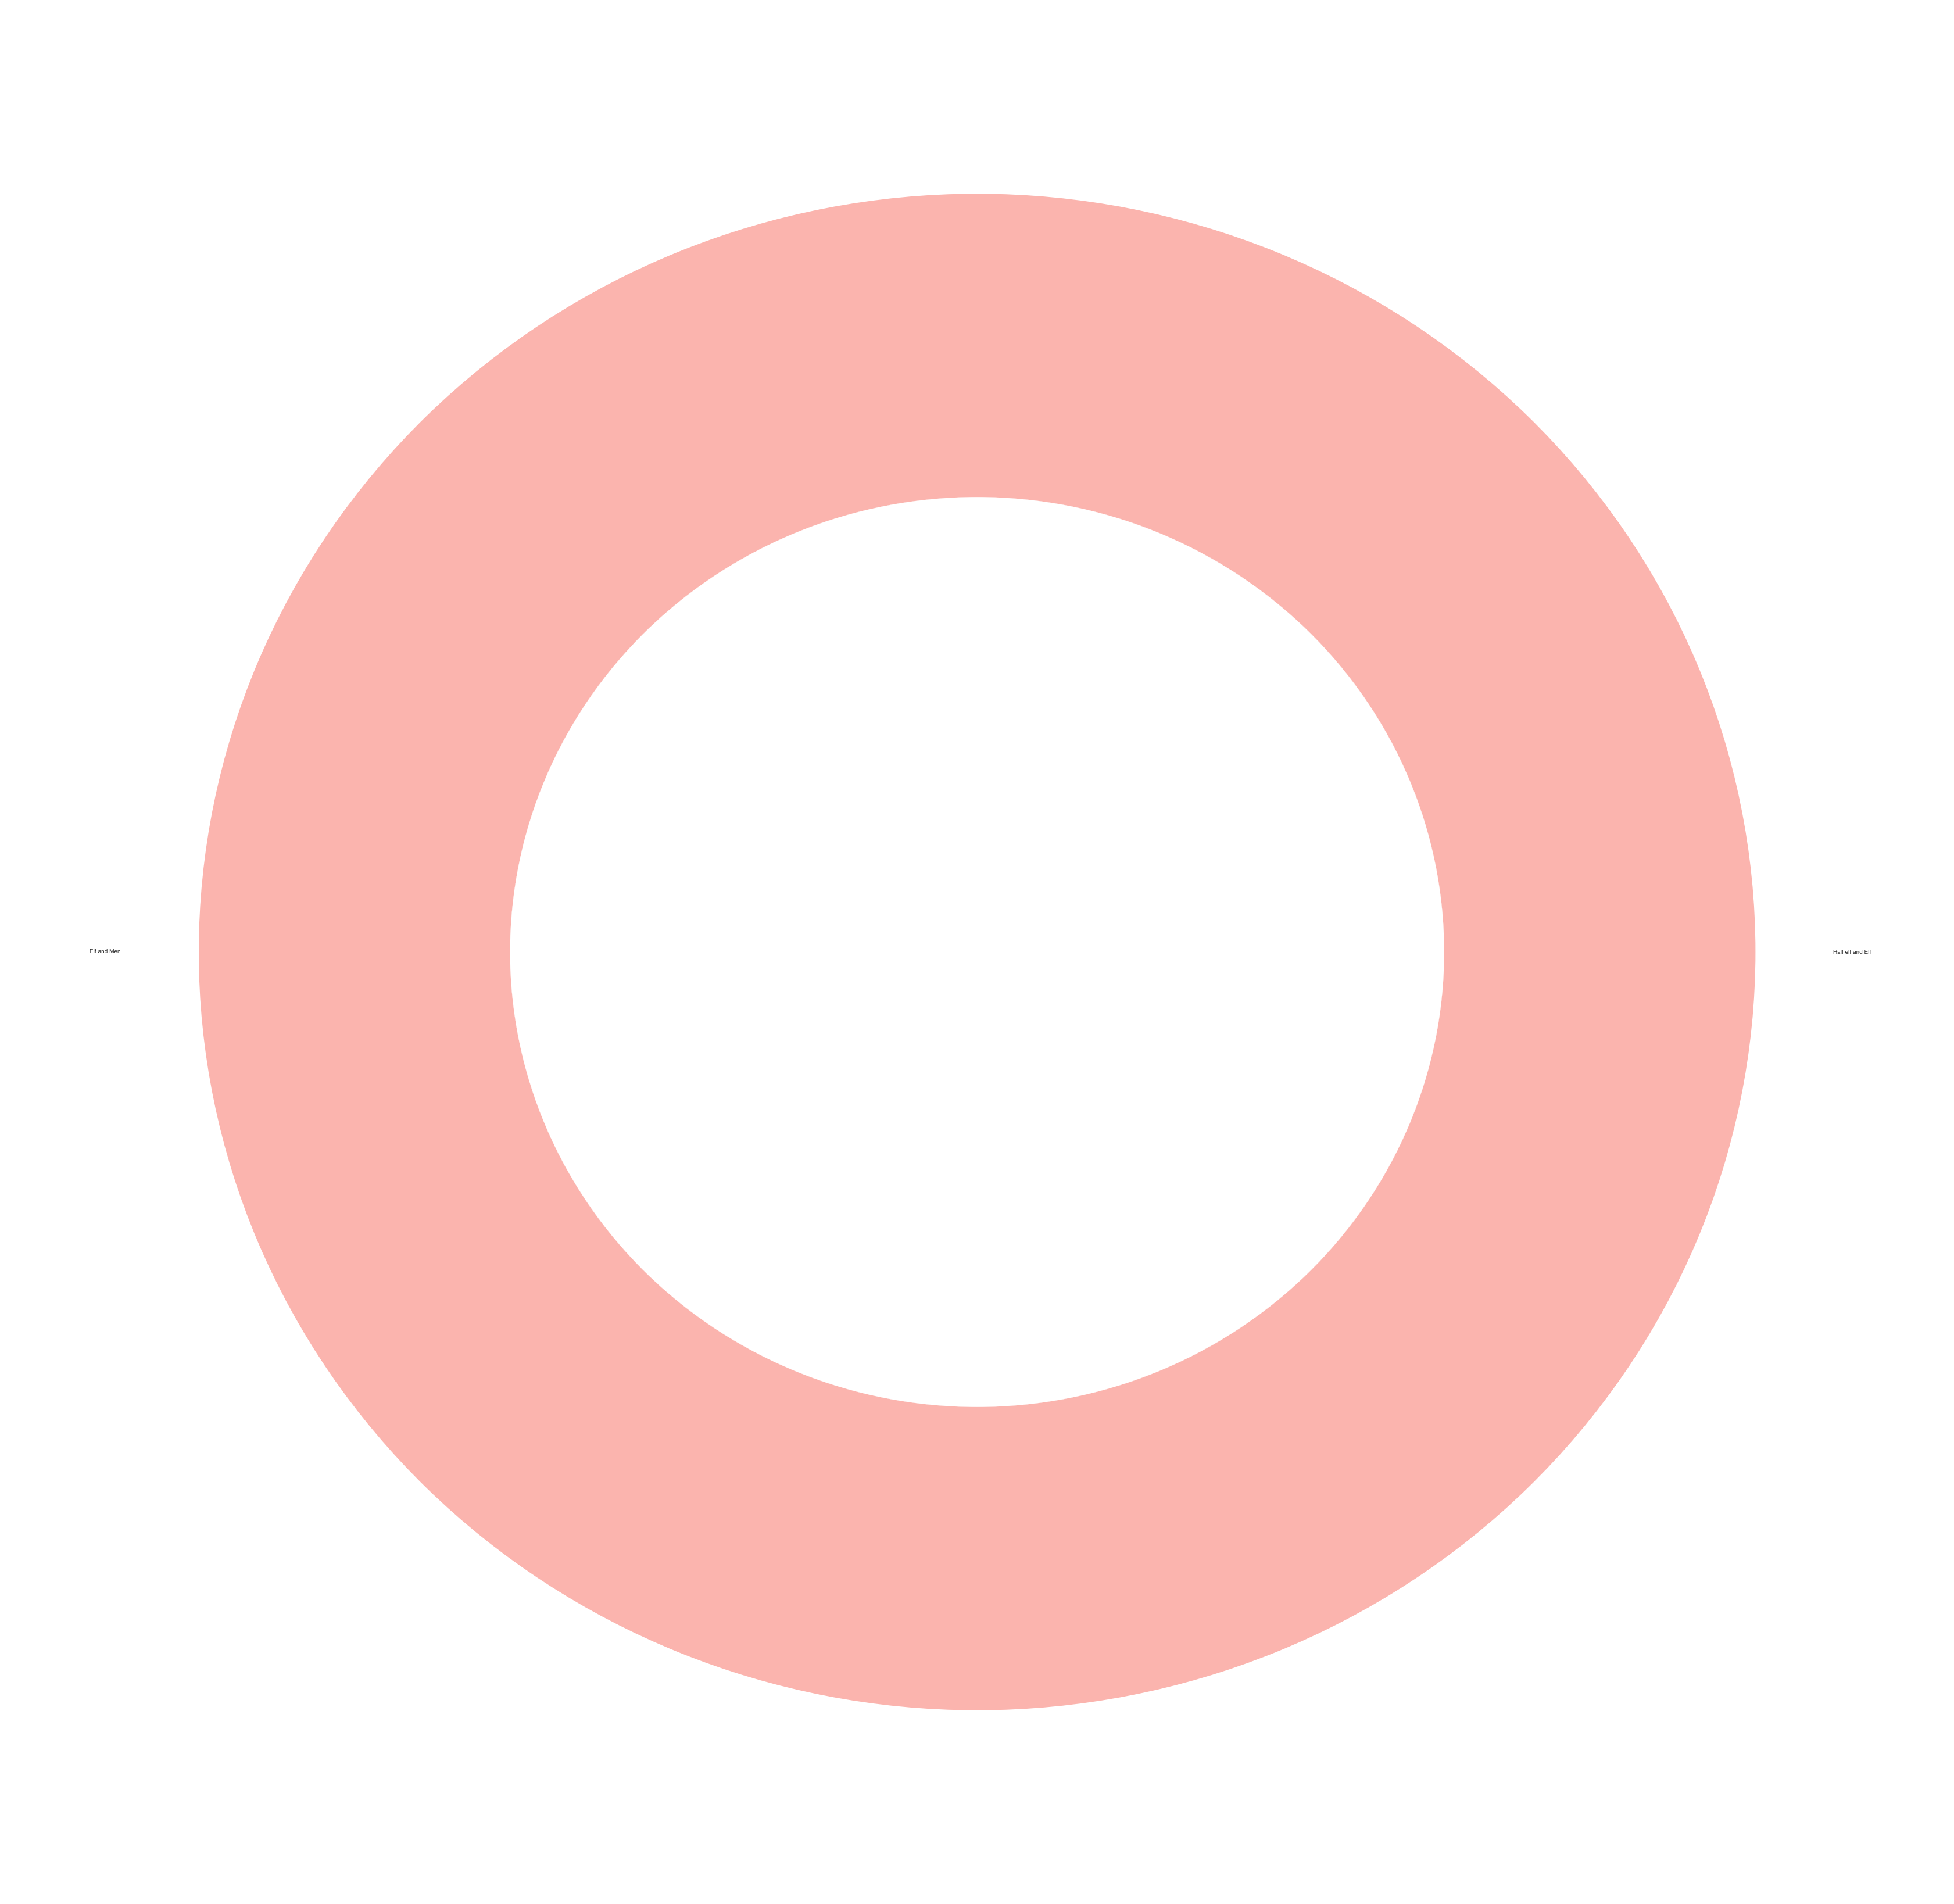

In [559]:
names="Elf and Men", "Half elf and Elf"
size=[1,0]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.6, color='white')

plt.pie(size, labels=names, colors=Pastel1_7.hex_colors)
p=plt.gcf()

p.gca().add_artist(my_circle)
plt.show()
